<a href="https://colab.research.google.com/github/timaZhuk/ML_learning2023/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Magic Gamma Telescope (Cherenkov gamma Telescope)
* This Cherenkov radiation (of visible to UV wavelengths) leaks through the atmosphere and gets recorded in the detector, allowing reconstruction of the shower parameters.
* a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image)
* A principal component analysis is performed in the camera plane, which results in a correlation axis and defines an ellipse. If the depositions were distributed as a bivariate Gaussian, this would be an equidensity ellipse.
*
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

* Link to colab
https://colab.research.google.com/drive/16w3TDn_tAku17mum98EWTmjaLHAJcsk0?usp=sharing


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import for scaling data
from sklearn.preprocessing import StandardScaler
# for oversampling training data
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df=pd.read_csv("sample_data/magic04.data", names=cols) # add names of columns in dataset
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
# we have to convert it to g = 0, h = 1
df["class"].unique() # shows unique names of class column

array(['g', 'h'], dtype=object)

In [ ]:
df['class'] = (df['class']=='g').astype(int) # it will find column 'class' if values == 'g' it will convert to integer number =1, vise vers h=0

In [ ]:
df.head(7)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
6   48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1  
5   3.6130  238.0980      1  
6   4.7920  219.0870      1

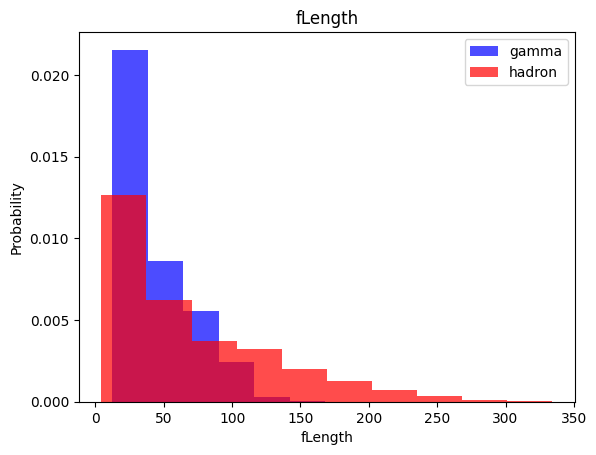

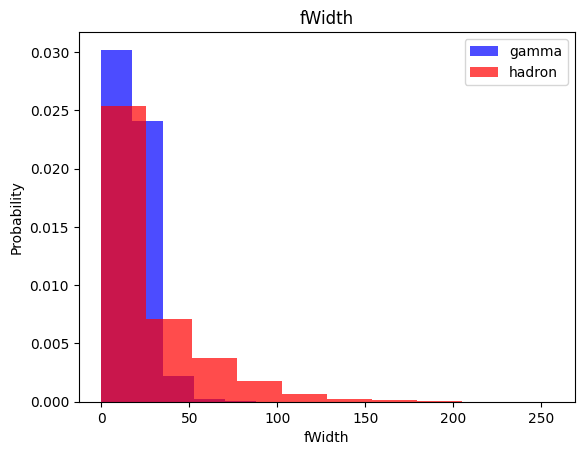

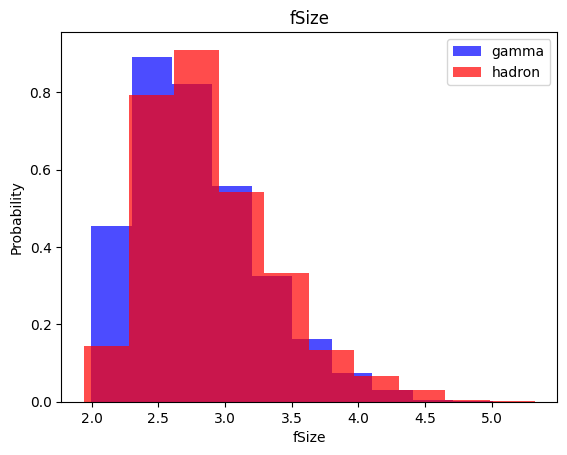

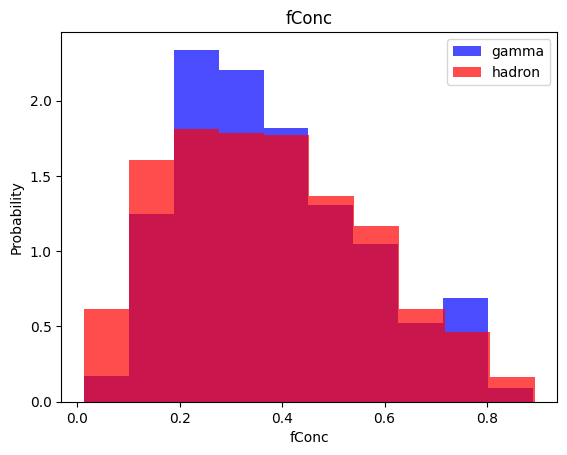

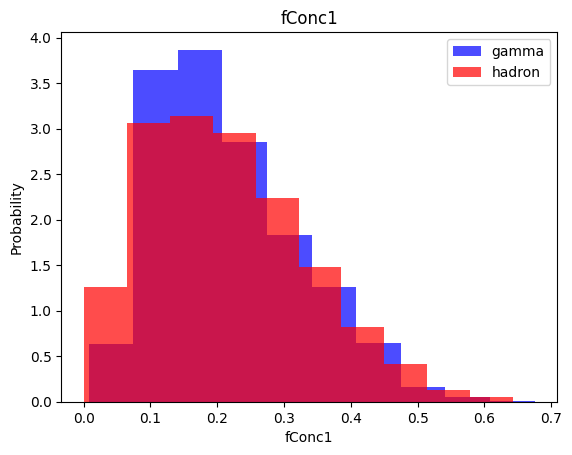

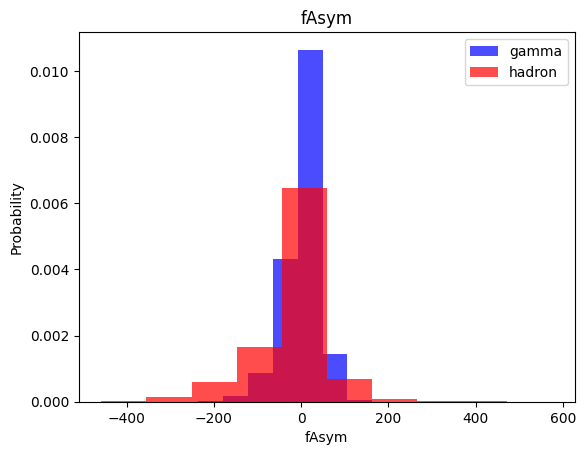

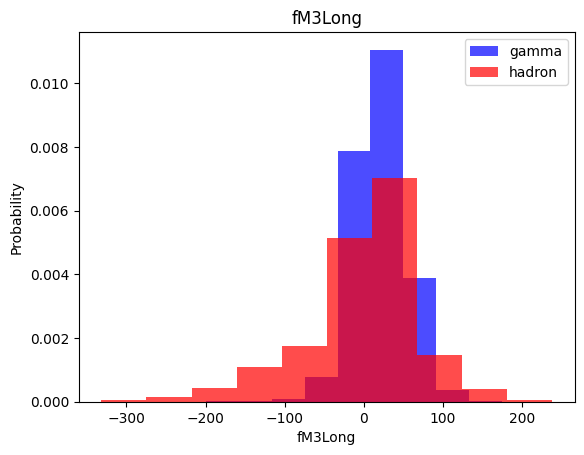

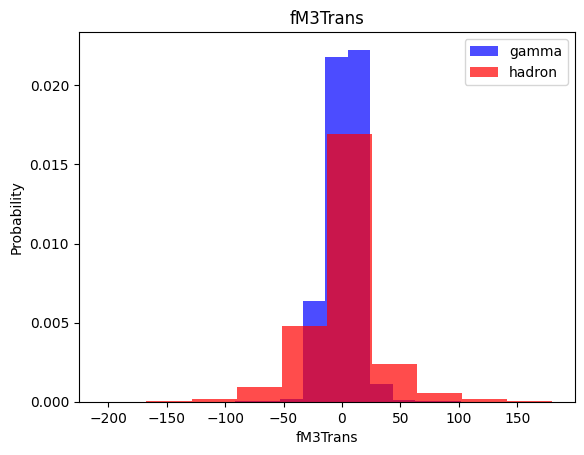

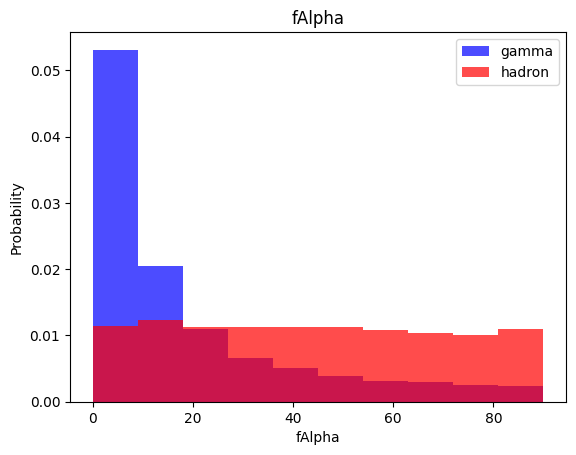

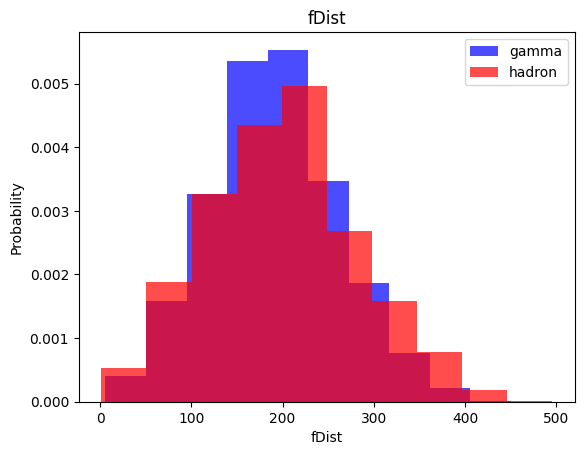

In [ ]:
# plot of histogram
for label in cols[:-1]:  # iterate over col=class and its features
  plt.hist(df[df['class']==1][label], color='blue',label = 'gamma', alpha = 0.7, density = True) # if class.value=1 plot hist a with labels
  plt.hist(df[df['class']==0][label], color='red',label = 'hadron', alpha = 0.7, density = True) # if class.value=1 plot hist a with labels
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()



In [ ]:
len(df)

19020

# Train Validation of Data sets

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

## How to split data into 3 sets (train, validation and test)?
* To split the data into three sets, create a DataFrame having the overall data * and then use the **numpy.split()** method by specifying **the size (or, percentage)** of the data that you want for the particular sets.
* Numpy solution. We will **shuffle the whole dataset first (df.sample(frac=1, random_state=42))** and then split our data set into the following parts:

* 60% - train set,
* 20% - validation set,
* 20% - test set
* Let us understand with the help of an examples:
* train, validate, test = \
              np.split(df.sample(frac=1, random_state=42),
                       [int(.6*len(df)), int(.8*len(df))])
* import numpy
* import numpy as np

* import pandas
* import pandas as pd

* Creating a dataframe
* df = pd.DataFrame(np.random.rand(10, 5), columns=list("ABCDE"))

* Settings maximum rows and columns
* to display/print all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display original dataframe
* print("Original DataFrame:\n", df, "\n")

# Splitting the data into 3 parts
* train, test, validate = np.split(
    df.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

# Display different sets
print("Training set:\n", train, "\n")
print("Testing set:\n", test, "\n")
print("Validation set:\n", validate)


In [ ]:
# in split(). I shuffle my data (df) by means of "sample(frac=1)"
# in split [int(0.6*len(df)),int(0.8*len(df))] it basically means train-0-60%, validation between 60-80%, test-80-100%
train, valid , test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])


In [ ]:
# z = np.array([[1, 2, 3, 4],
#         [5, 6, 7, 8],
#         [9, 10, 11, 12]])
# z.shape
#(3, 4)
# Now trying to reshape with (-1, 1) . We have provided column as 1 but rows as unknown .
#So we get result new shape as (12, 1).again compatible with original shape(3,4)

#The main idea is to normalize/standardize i.e. μ = 0 and σ = 1 your features/variables/columns of X,
# individually, before applying any machine learning model.
# I assume that you have a matrix X where each row/line is a sample/observation and each column is a variable/feature
#-----------------------------------------------------------
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# 4 samples/observations and 2 variables/features
# data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(data)

#print(data)
#[[0, 0],
#[1, 0],
# [0, 1],
# [1, 1]])

# print(scaled_data)
# [[-1. -1.]
# [ 1. -1.]
# [-1.  1.]
#  [ 1.  1.]]


In [ ]:
# But each features have diffetent numerical values. We have to scaled all columns with features (normalization).
# create function scale function
def scale_dataset(dataframe, oversample = False):
  x = dataframe[dataframe.columns[:-1]].values # all values (features) excluding last class=column
  y = dataframe[dataframe.columns[-1]].values # class column´s values


  # transform  x to new values in X -normalized
  scaler = StandardScaler()
  X = scaler.fit_transform(x) # two dimensional array
  #
  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y) # create more sample of data

  #creating a 2D numpy array (we join together features colums with class columns)
  data = np.hstack((X,np.reshape(y,(-1,1)))) # stack it side by side (horizontally)

  return data, X, y







In [ ]:
len(train), len(test), len(valid)

(11412, 3804, 3804)

In [ ]:
# train['class] == 1 only valies with  class==1
# train[train['class'] == 1] - we choose only values with class==1
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))

7426
3986


In [ ]:
# We have to oversample our training set
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)


In [ ]:
len(train) # doubled dataset

14852

In [ ]:
sum(y_train==0), sum(y_train == 1)

(7426, 7426)

# KNN implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# import for classification report
from sklearn.metrics import classification_report

# creating model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)



KNeighborsClassifier()

In [ ]:
# make a prediction depend on our knn_model
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78      2484
           1       0.76      0.86      0.81      2484

    accuracy                           0.80      4968
   macro avg       0.80      0.80      0.79      4968
weighted avg       0.80      0.80      0.79      4968



# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.40      0.53      2484
           1       0.60      0.88      0.71      2484

    accuracy                           0.64      4968
   macro avg       0.68      0.64      0.62      4968
weighted avg       0.68      0.64      0.62      4968



# Code Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.73      0.76      2485
           1       0.75      0.83      0.79      2485

    accuracy                           0.78      4970
   macro avg       0.78      0.78      0.78      4970
weighted avg       0.78      0.78      0.78      4970



# Support Vector Machine  (SVM)

In [ ]:
from sklearn.svm import SVC #SVC support vector clasifier


In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)


In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2461
           1       0.81      0.90      0.85      2461

    accuracy                           0.84      4922
   macro avg       0.85      0.84      0.84      4922
weighted avg       0.85      0.84      0.84      4922



# Neural Networks
# Tensor flow
* Sequential - means connected neurons layers in neural network to the next
* Dense (nodes=16, activation = 'relu, tanh, or sigmoid') - means they (layers, neurons) are interconnected
*

In [ ]:
import tensorflow as tf


In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                 metrics=['accuracy'])

In [ ]:
history=nn_model.fit(
      X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

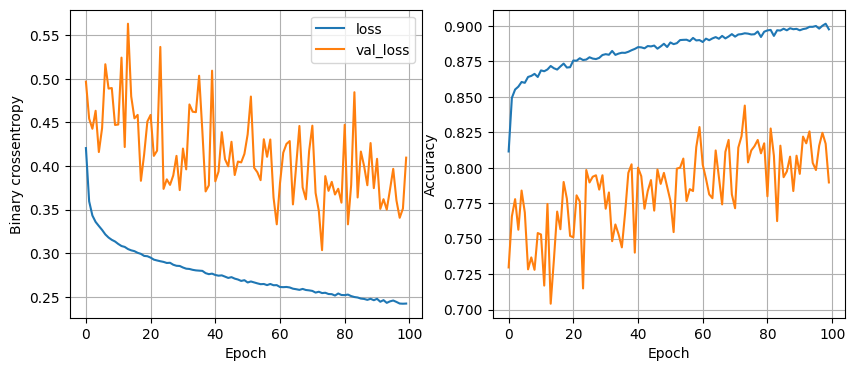

In [ ]:
# loss function in tensorflow
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)
  plt.show()

# accuracy function
#def plot_accuracy(history):
#  plt.plot(history.history['accuracy'], label='accuracy')
#  plt.plot(history.history['val_accuracy'], label='val_accuracy')
#  plt.xlabel('Epoch')
#  plt.ylabel('Accuracy')
#  plt.legend()
#  plt.grid(True)
#  plt.show()

plot_history(history)

In [ ]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size= 32, validation_split=0.2
)


Epoch 1/100
372/372 [==============================] - 3s 5ms/step - loss: 0.4575 - accuracy: 0.7869 - val_loss: 0.5774 - val_accuracy: 0.6589
Epoch 2/100
372/372 [==============================] - 1s 4ms/step - loss: 0.3798 - accuracy: 0.8343 - val_loss: 0.5415 - val_accuracy: 0.7278
Epoch 3/100
372/372 [==============================] - 1s 4ms/step - loss: 0.3571 - accuracy: 0.8487 - val_loss: 0.4738 - val_accuracy: 0.7675
Epoch 4/100
372/372 [==============================] - 1s 3ms/step - loss: 0.3460 - accuracy: 0.8552 - val_loss: 0.4996 - val_accuracy: 0.7480
Epoch 5/100
372/372 [==============================] - 1s 2ms/step - loss: 0.3386 - accuracy: 0.8570 - val_loss: 0.5312 - val_accuracy: 0.7315
Epoch 6/100
372/372 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8606 - val_loss: 0.4347 - val_accuracy: 0.7739
Epoch 7/100
372/372 [==============================] - 1s 2ms/step - loss: 0.3285 - accuracy: 0.8611 - val_loss: 0.4354 - val_accuracy: 0.7819

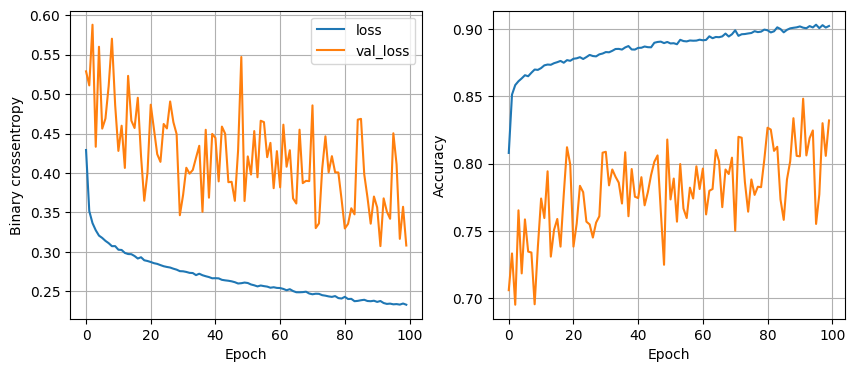

In [ ]:
plot_history(history)


In [ ]:
#--------------- function for dropout layer, lr - learning rate--------------------------------------
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                   metrics=['accuracy'])
  history=nn_model.fit(
      X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history
#-----------------------------------------------------------------------------------------------------




num_nodes = 16, dropout = 0, lr = 0.01, batch_size = 32


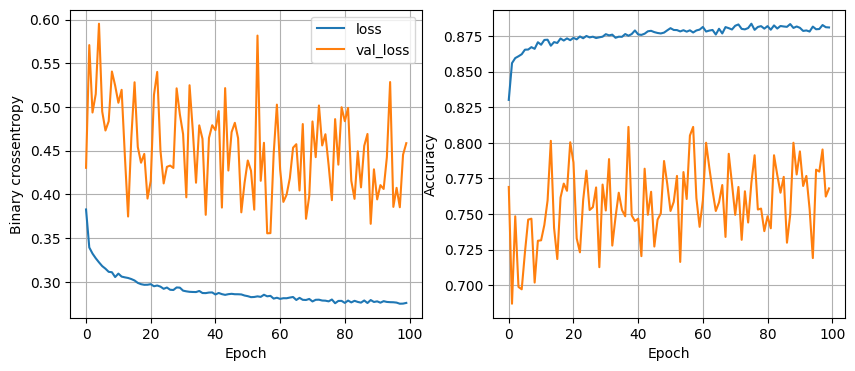

154/154 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8369
num_nodes = 16, dropout = 0, lr = 0.01, batch_size = 64


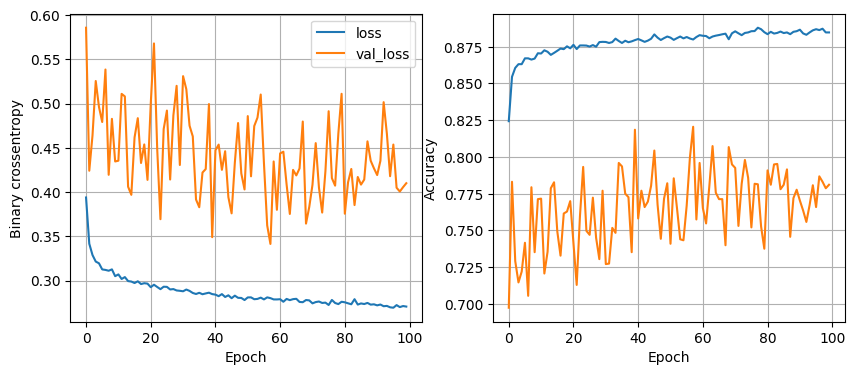

154/154 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.8420
num_nodes = 16, dropout = 0, lr = 0.01, batch_size = 128


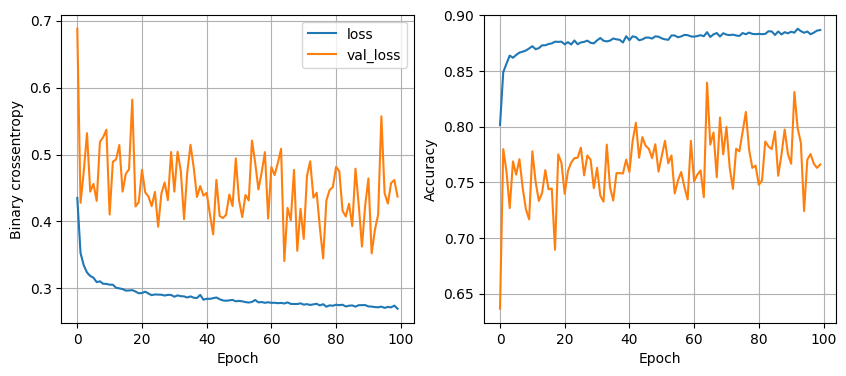

154/154 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8377
num_nodes = 16, dropout = 0, lr = 0.005, batch_size = 32


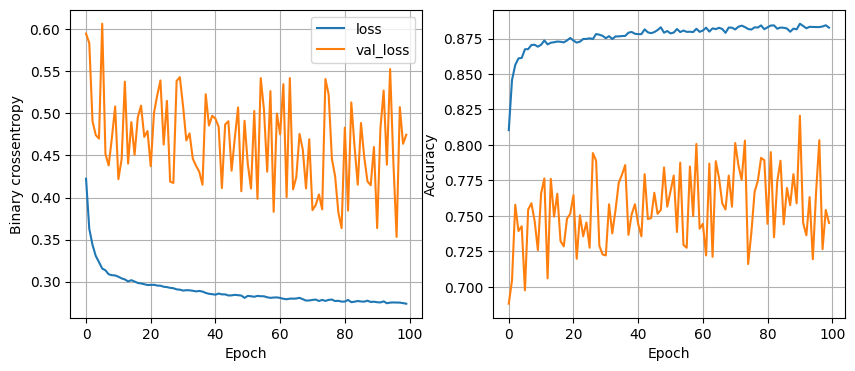

154/154 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8447
num_nodes = 16, dropout = 0, lr = 0.005, batch_size = 64


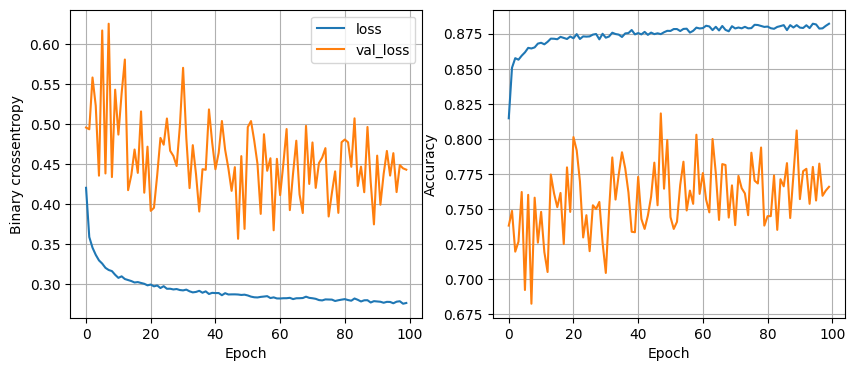

154/154 [==============================] - 0s 2ms/step - loss: 0.3720 - accuracy: 0.8434
num_nodes = 16, dropout = 0, lr = 0.005, batch_size = 128


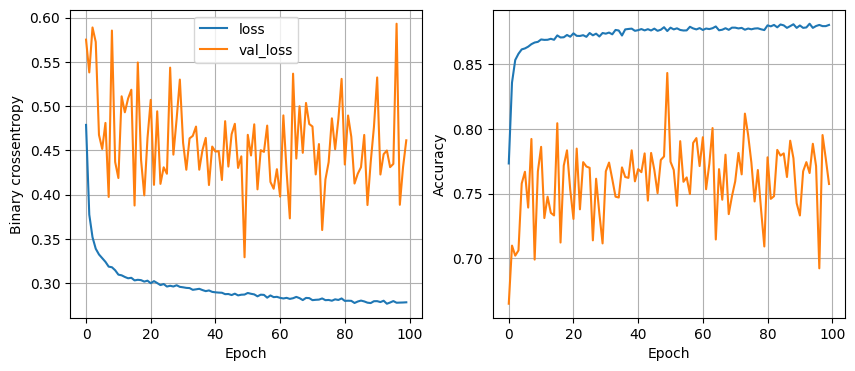

154/154 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8467
num_nodes = 16, dropout = 0, lr = 0.001, batch_size = 32


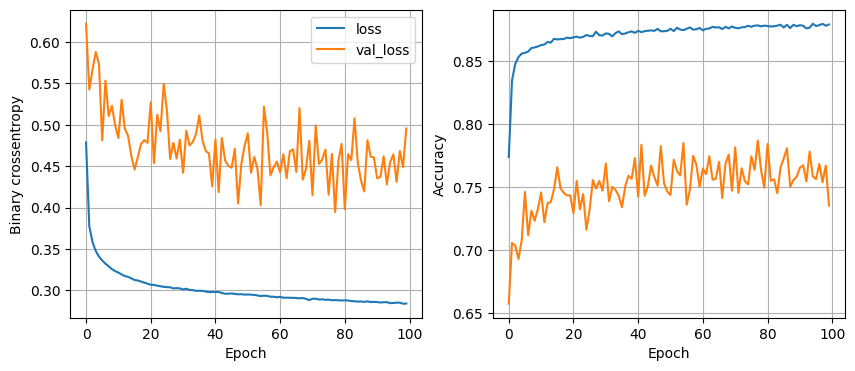

154/154 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8420
num_nodes = 16, dropout = 0, lr = 0.001, batch_size = 64


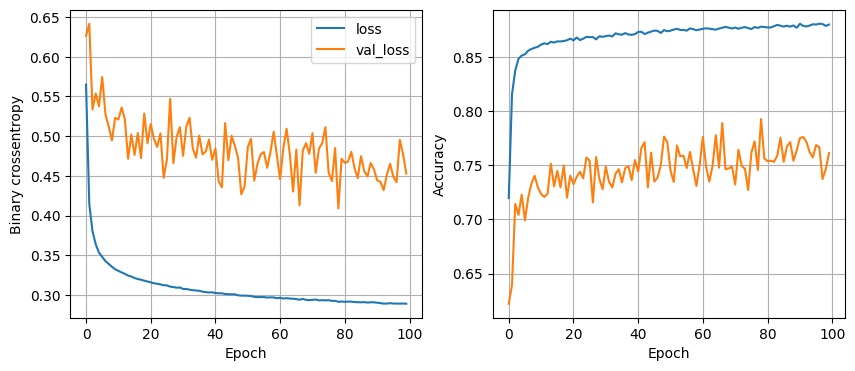

154/154 [==============================] - 1s 3ms/step - loss: 0.3659 - accuracy: 0.8420
num_nodes = 16, dropout = 0, lr = 0.001, batch_size = 128


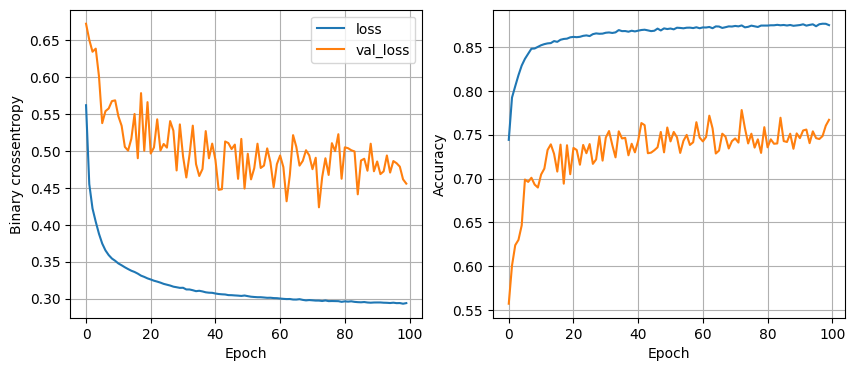

154/154 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.8414
num_nodes = 16, dropout = 0.2, lr = 0.01, batch_size = 32


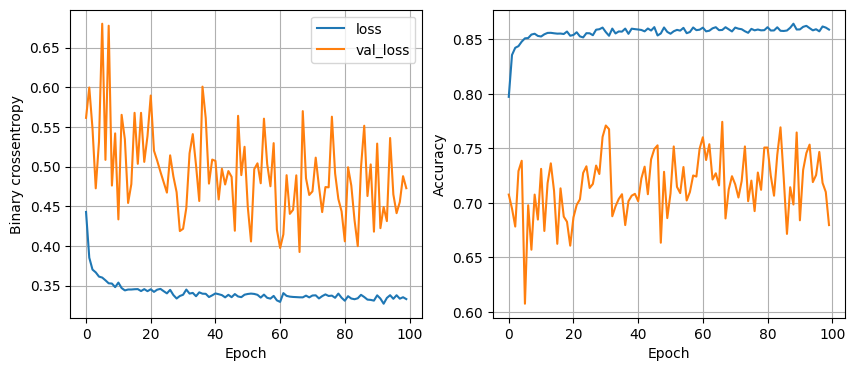

154/154 [==============================] - 1s 4ms/step - loss: 0.3763 - accuracy: 0.8150
num_nodes = 16, dropout = 0.2, lr = 0.01, batch_size = 64


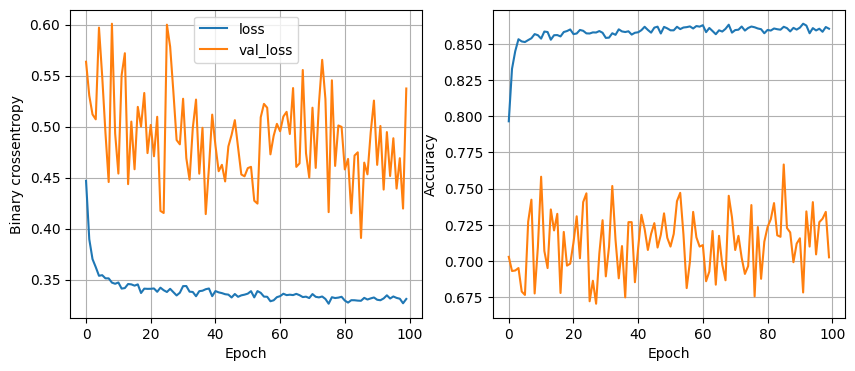

154/154 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8264
num_nodes = 16, dropout = 0.2, lr = 0.01, batch_size = 128


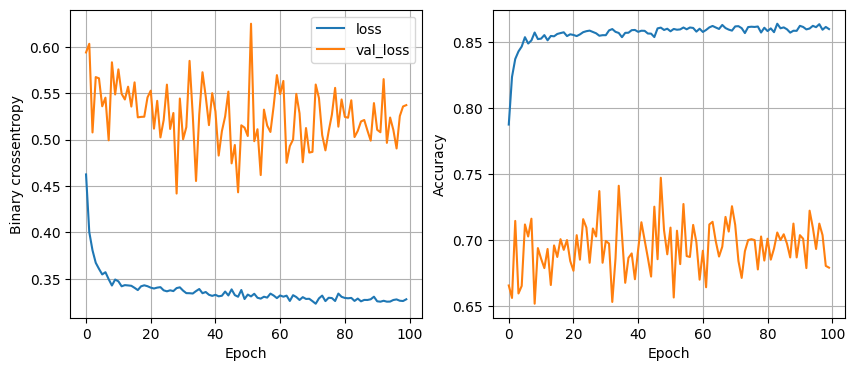

154/154 [==============================] - 0s 2ms/step - loss: 0.3850 - accuracy: 0.8229
num_nodes = 16, dropout = 0.2, lr = 0.005, batch_size = 32


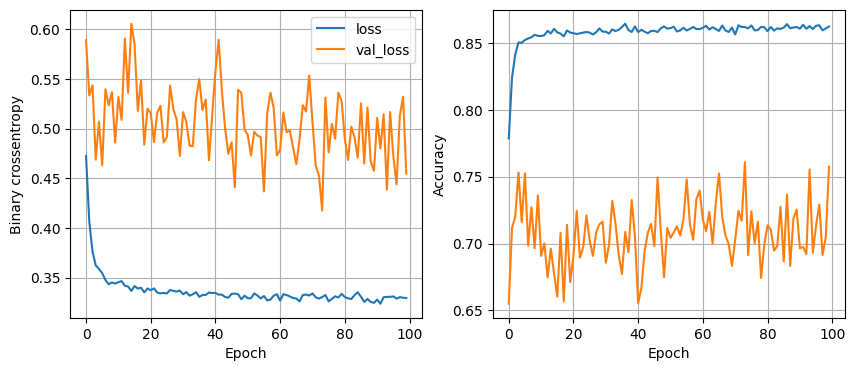

154/154 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8329
num_nodes = 16, dropout = 0.2, lr = 0.005, batch_size = 64


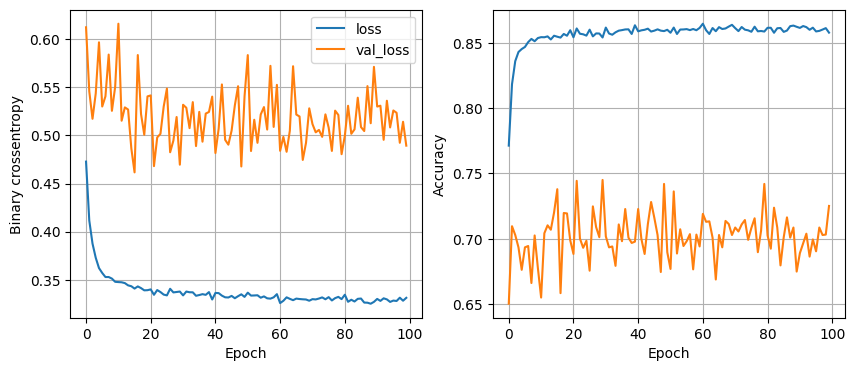

154/154 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8300
num_nodes = 16, dropout = 0.2, lr = 0.005, batch_size = 128


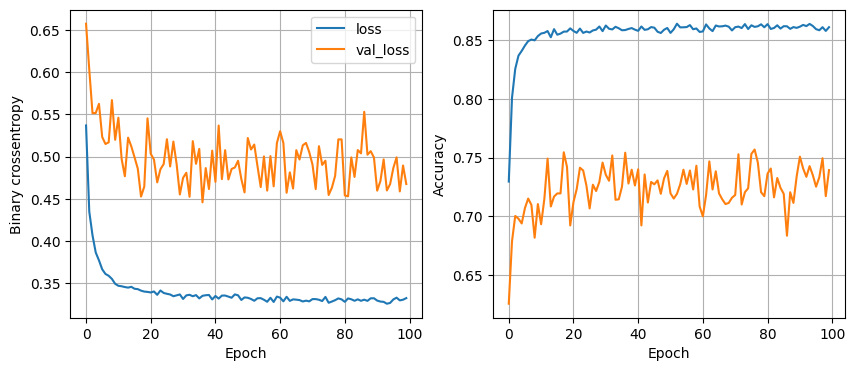

154/154 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0.8343
num_nodes = 16, dropout = 0.2, lr = 0.001, batch_size = 32


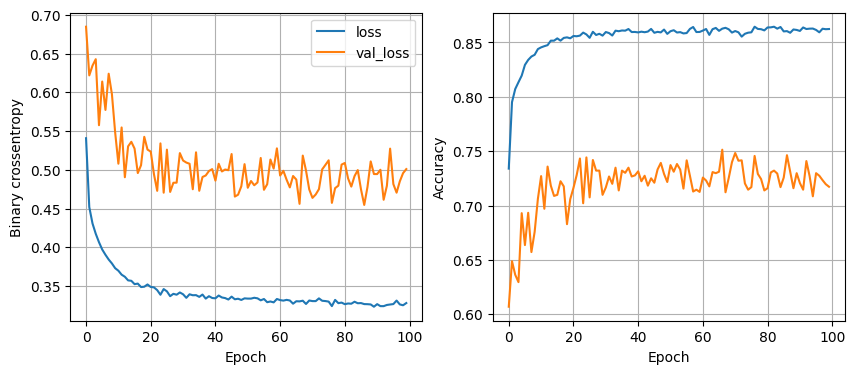

154/154 [==============================] - 1s 3ms/step - loss: 0.3739 - accuracy: 0.8300
num_nodes = 16, dropout = 0.2, lr = 0.001, batch_size = 64


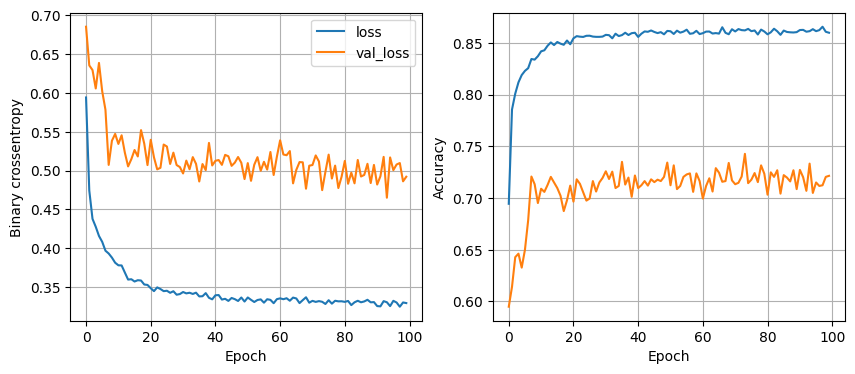

154/154 [==============================] - 0s 2ms/step - loss: 0.3749 - accuracy: 0.8298
num_nodes = 16, dropout = 0.2, lr = 0.001, batch_size = 128


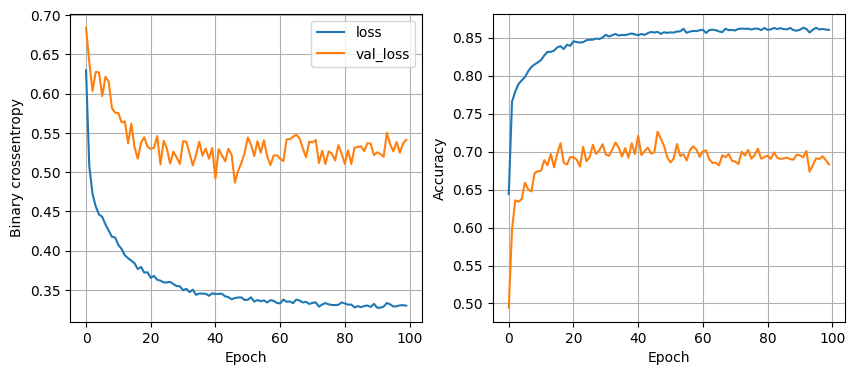

154/154 [==============================] - 0s 3ms/step - loss: 0.3877 - accuracy: 0.8235
num_nodes = 32, dropout = 0, lr = 0.01, batch_size = 32


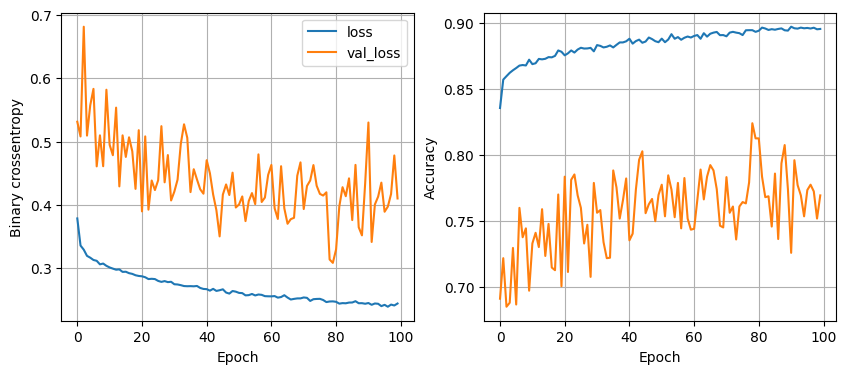

154/154 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8274
num_nodes = 32, dropout = 0, lr = 0.01, batch_size = 64


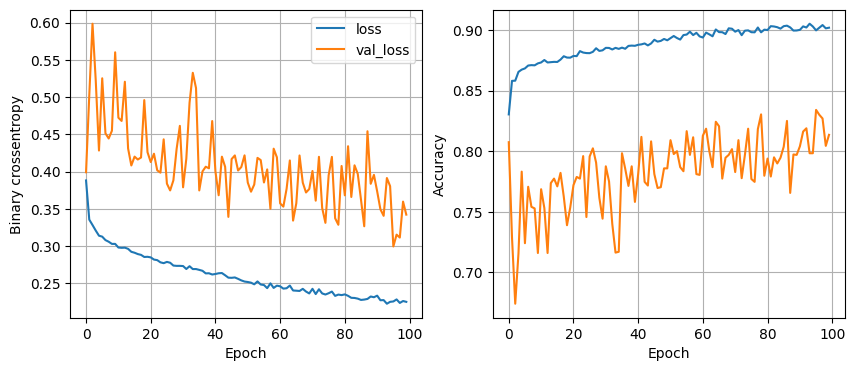

154/154 [==============================] - 0s 2ms/step - loss: 0.4367 - accuracy: 0.8396
num_nodes = 32, dropout = 0, lr = 0.01, batch_size = 128


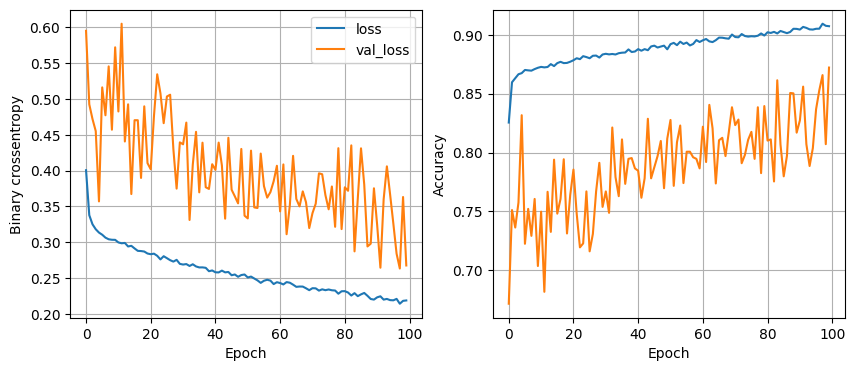

154/154 [==============================] - 1s 4ms/step - loss: 0.4355 - accuracy: 0.8412
num_nodes = 32, dropout = 0, lr = 0.005, batch_size = 32


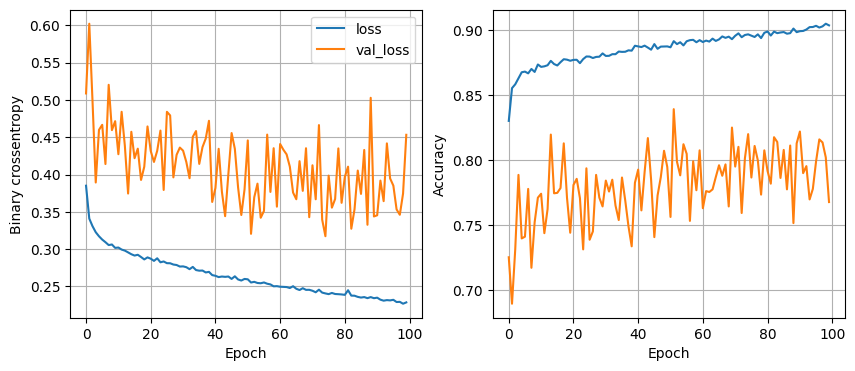

154/154 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.8327
num_nodes = 32, dropout = 0, lr = 0.005, batch_size = 64


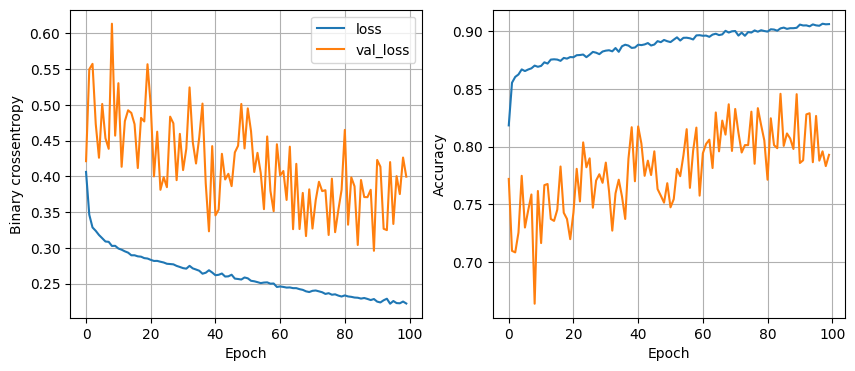

154/154 [==============================] - 0s 2ms/step - loss: 0.4290 - accuracy: 0.8365
num_nodes = 32, dropout = 0, lr = 0.005, batch_size = 128


KeyboardInterrupt: ignored

In [ ]:
#----------------------------------model------------------------------------------------------------------------

least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'num_nodes = {num_nodes}, dropout = {dropout_prob}, lr = {lr}, batch_size = {batch_size}')
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)
        #if val_loss < least_val_loss:
          #least_val_loss = val_loss
          #least_loss_model = model




In [ ]:
batch_size = 128
lr = 0.02
dropout_prob = 0.2
num_nodes = 64
epochs=100
model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)

y_pred = model.predict(X_test)
y_pred = (y_pred>0.5).astype(int)
y_pred.reshape(-1,)

156/156 [==============================] - 0s 2ms/step


array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.71      0.81      2484
           1       0.76      0.96      0.85      2484

    accuracy                           0.83      4968
   macro avg       0.85      0.83      0.83      4968
weighted avg       0.85      0.83      0.83      4968



# Seoul Bike Sharing Demand Data Set
* https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

# Regression Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy # library that helps to copy things
import seaborn as sns # library for matplotlib
import tensorflow as tf
# Linaer regression model
from sklearn.linear_model import LinearRegression

In [ ]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [ ]:
# UnicodeDecodeError: 'utf8' codec can't decode byte 0xa5 in position 0: invalid start byte
# If you get this error when trying to read a csv file, the read_csv() function from pandas
# lets you set the encoding: data = pd.read_csv(filename, encoding='unicode_escape')
df = pd.read_csv("sample_data/SeoulBikeData.csv",encoding='unicode_escape')
df = df.drop(["Date", "Holiday", "Seasons"], axis=1) # axis=1 means drop the label with column beneath


In [ ]:
# rename default columns name to our names created in dataset_col
df.columns = dataset_cols
# convert Yes and No to 1 and 0
df['functional'] = (df["functional"] == "Yes").astype(int)
# make all hours noon
df = df[df['hour']== 12]
df = df.drop(["hour"], axis=1) # drop the columns axis
df.head()


bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12          449   1.7        23   1.4        2000        -17.2       1.11   
36          479   4.3        41   1.3        1666         -7.8       1.09   
60          333   5.8        85   1.7         349          3.4       0.43   
84          393  -0.3        38   4.8        1823        -12.9       1.11   
108         321  -2.3        25   0.0        1962        -19.7       0.00   

     rain  snow  functional  
12    0.0   0.0           1  
36    0.0   0.0           1  
60    0.0   0.0           1  
84    0.0   0.0           1  
108   0.0   0.0           1

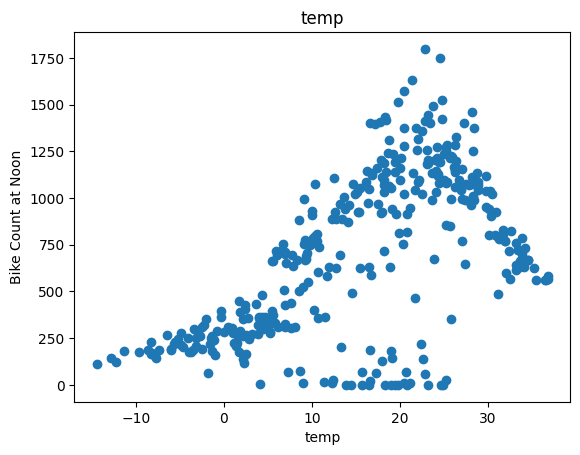

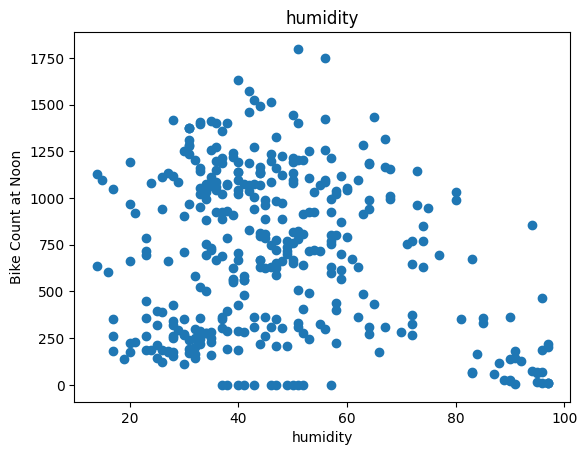

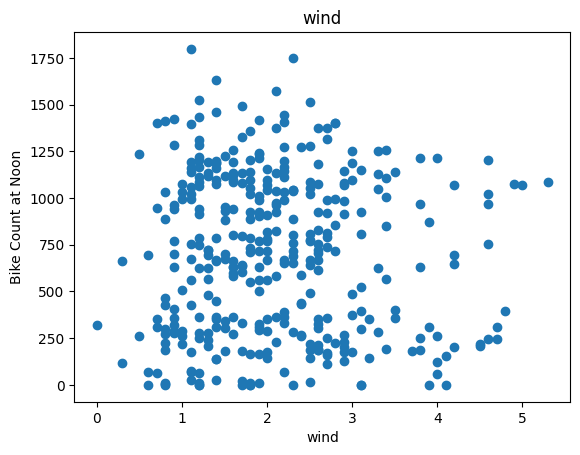

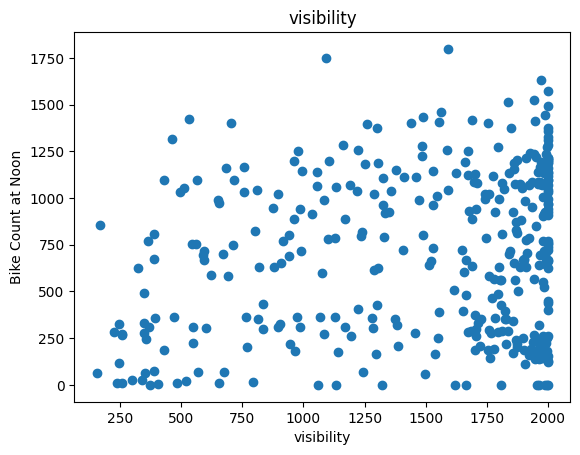

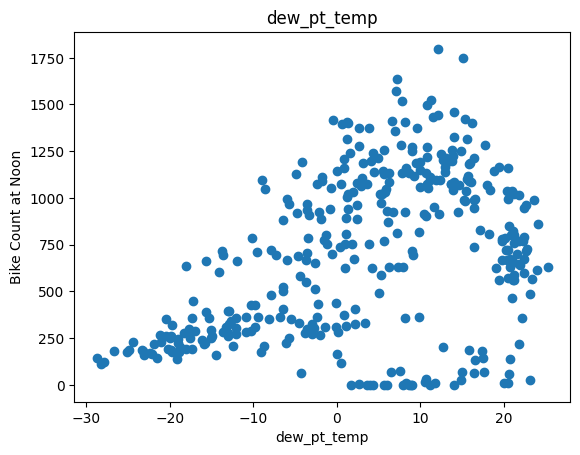

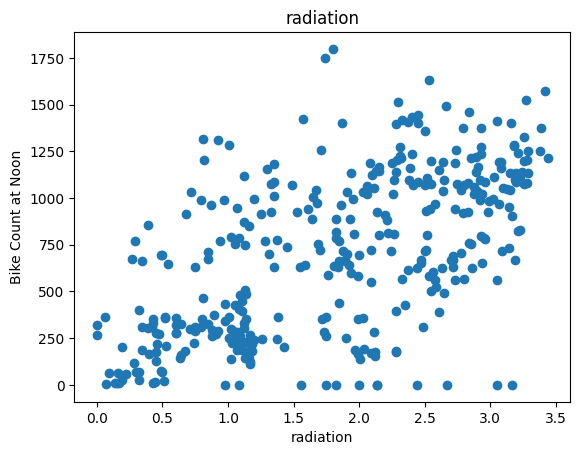

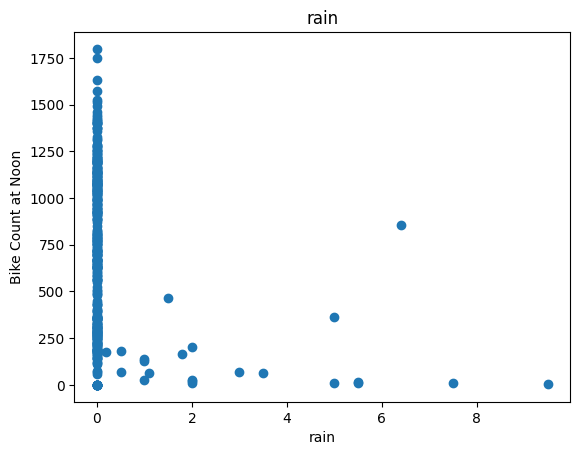

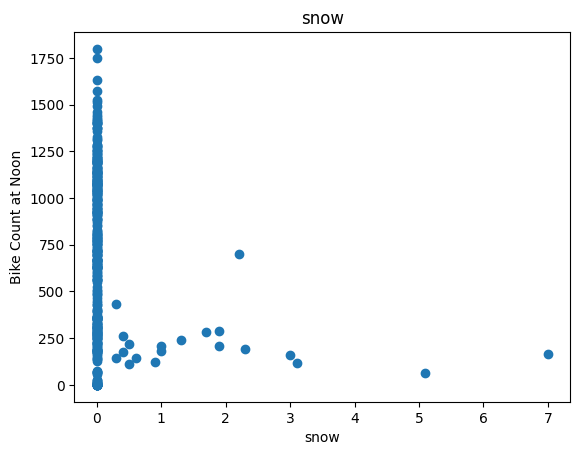

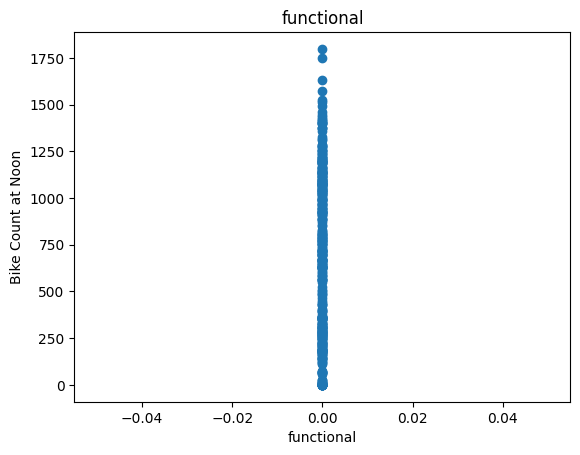

In [ ]:
# loop through the columns and plot graphs
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"]) # x-coluns, y-bike_count
  plt.title(label)
  plt.ylabel("Bike Count at Noon")
  plt.xlabel(label)
  plt.show()

In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis = 1)
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

In [ ]:
# Training/validation/ training data set
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# get xy function
def get_xy(dataframe, y_label, x_labels = None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    # we create a X list=DataFrame with (from) values in original df  excluding y_label (label)
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels)==1: # one name of feature in list of x_labels
      X = dataframe[x_labels[0]].values.reshape(-1,1) # creating 2D array
    else:
      X = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1,1) #.reshape(-1,1) # creating 2D array
  data = np.hstack((X,y)) # stack each X and y side by side "shoulder to shoulder"
  return data, X, y





In [ ]:
_,X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_,X_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_,X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])


In [ ]:
#X_train_temp

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)


LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_ )

[[20.87404222]] [388.9631816]


In [ ]:
temp_reg.score(X_test_temp, y_test_temp) # R^2 = 0...1

0.3244502421498897

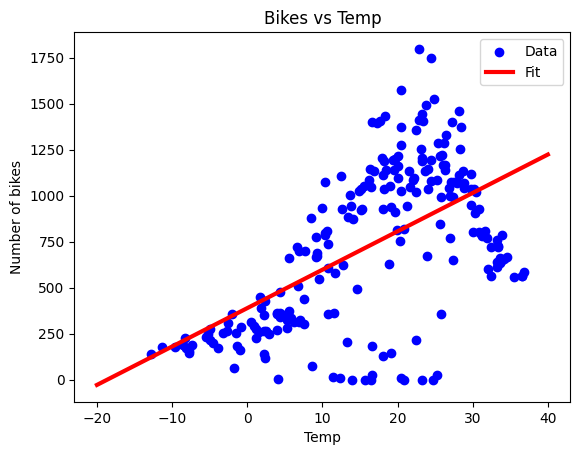

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # -20 ... 40 C MIN.....MAX
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Multiple LinearRegression

In [ ]:
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

In [ ]:
# Training/validation/ training data set
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#---------------------------------------------------------------------------------------
_,X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_,X_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_,X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])


In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_train_all, y_train_all)

0.443218715326854

# Regression with Neural Network

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None) # (1, ) use only one shape (temp)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [ ]:
# creating neural network
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), loss = 'mean_squared_error')

In [ ]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=1000,
    validation_data = (X_val_temp,y_val_temp)
)

In [ ]:
# loss function in tensorflow
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_oss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()





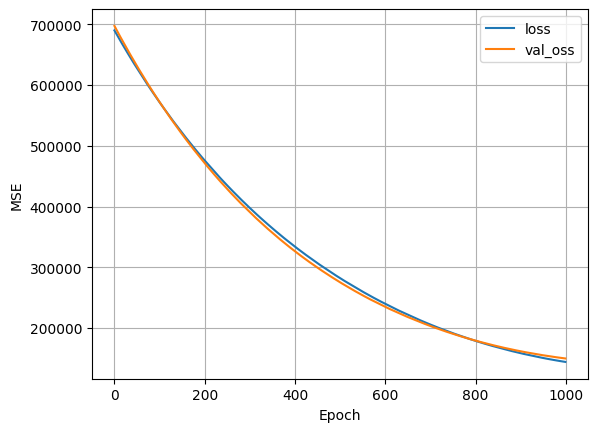

In [ ]:
plot_loss(history)

In [ ]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

temp_nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
history = temp_nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data = (X_val_temp,y_val_temp),
    verbose = 0, epochs = 100
)

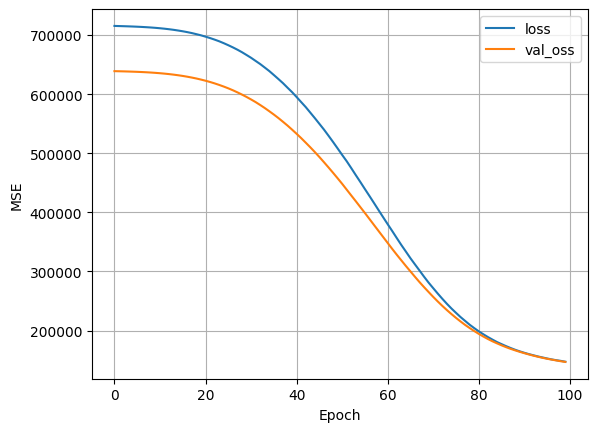

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 5ms/step


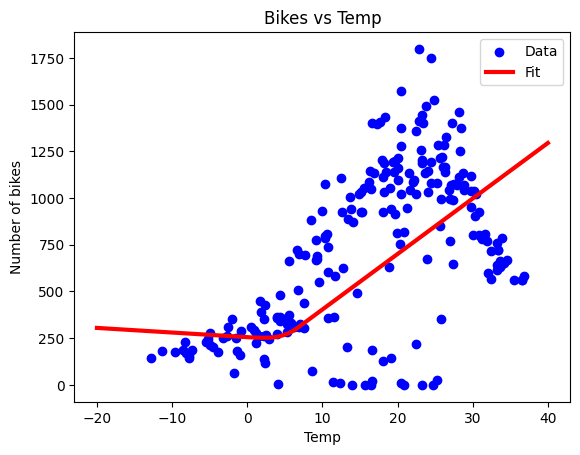

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100) # -20 ... 40 C MIN.....MAX
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

In [ ]:
all_temp_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_temp_normalizer.adapt(X_train_all)

nn_model = tf.keras.Sequential([
    all_temp_normalizer,
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    #tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

nn_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_squared_error')


In [ ]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data = (X_val_all, y_val_all),
    verbose = 0, epochs = 100

)

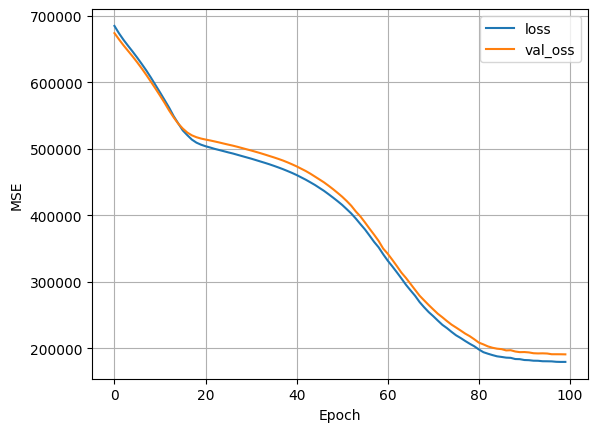

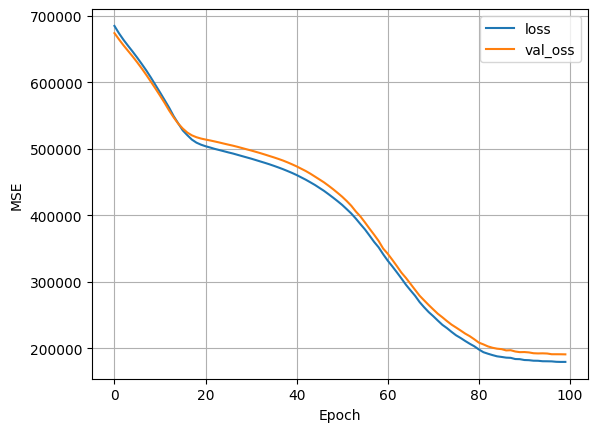

In [ ]:
plot_loss(history)

In [ ]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(X_test_all, y_test_all)

0.529571258708504

In [ ]:
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

3/3 [==============================] - 0s 5ms/step


In [ ]:
def MSE(y_pred, y_real):
  return (np.square(y_pred-y_real)).mean()




In [ ]:
MSE(y_pred_lr,y_test_all)

76727.96831526456

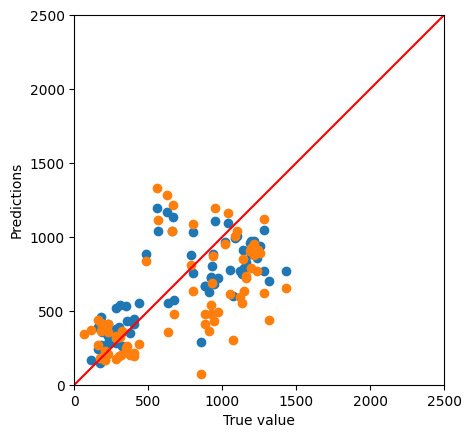

In [ ]:
ax = plt.axes(aspect = "equal")
plt.scatter(y_test_all, y_pred_lr, label='lin Reg Predict')
plt.scatter(y_test_all, y_pred_nn, label='lin model Predict')
plt.xlabel("True value")
plt.ylabel("Predictions")
lims=[0, 2500]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims, c="red")

# seeds Data Set
* https://archive.ics.uci.edu/dataset/236/seeds


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',  'groove', 'class']
df = pd.read_csv('sample_data/seeds_dataset.txt', names=cols, sep='\s+') # spaces as separater.
df.head() # why  all data are NaN funky

area  perimeter  compactness  length  width  asymmetry  groove  class
0  15.26      14.84       0.8710   5.763  3.312      2.221   5.220      1
1  14.88      14.57       0.8811   5.554  3.333      1.018   4.956      1
2  14.29      14.09       0.9050   5.291  3.337      2.699   4.825      1
3  13.84      13.94       0.8955   5.324  3.379      2.259   4.805      1
4  16.14      14.99       0.9034   5.658  3.562      1.355   5.175      1

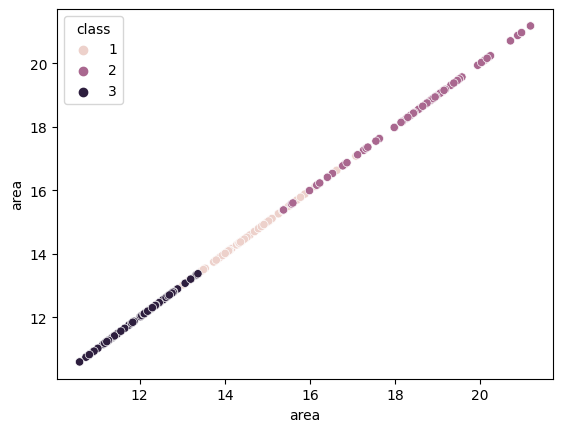

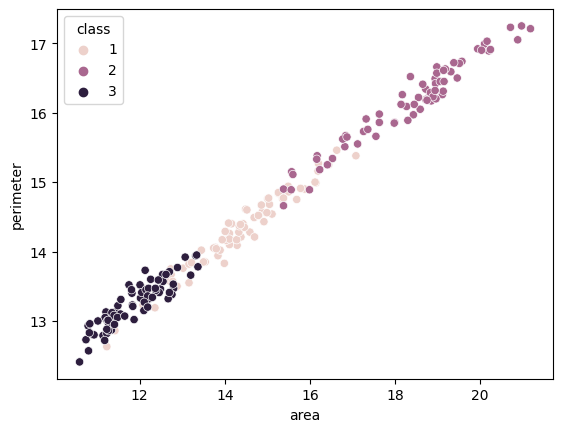

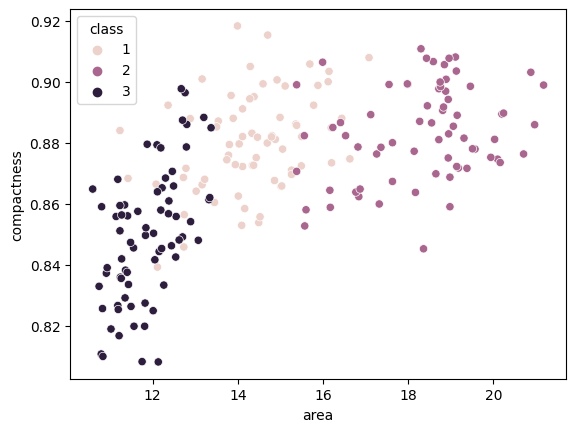

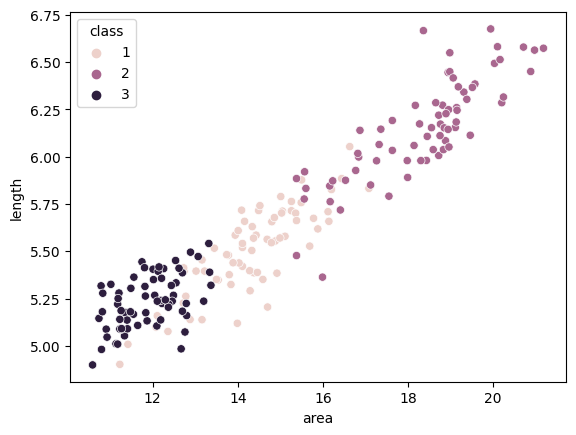

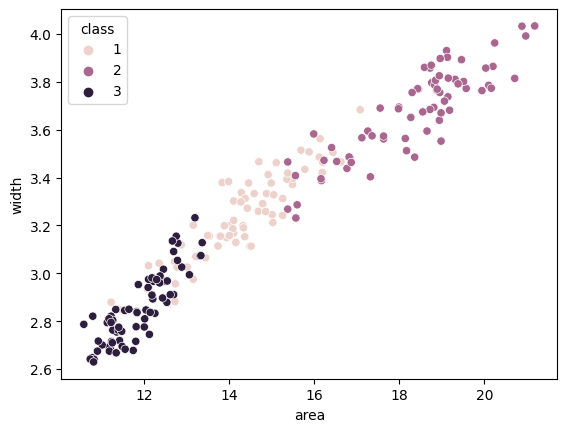

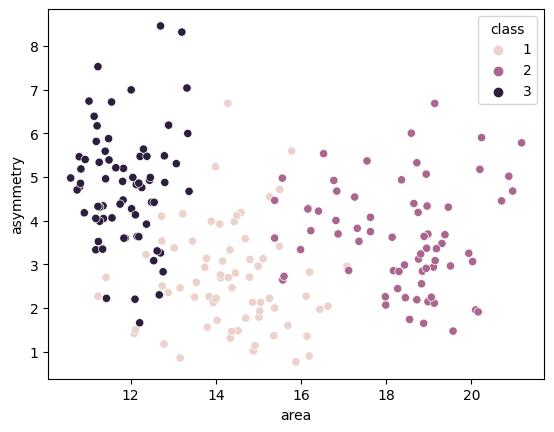

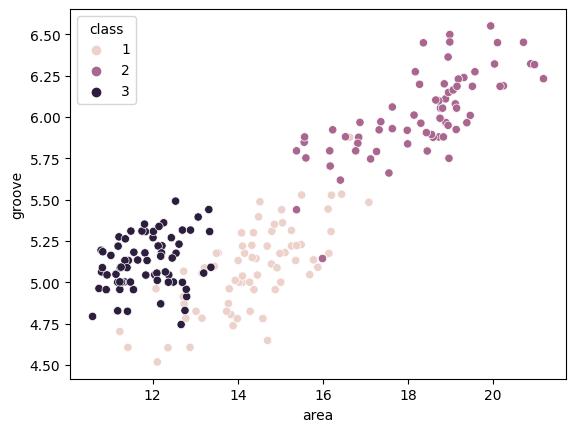

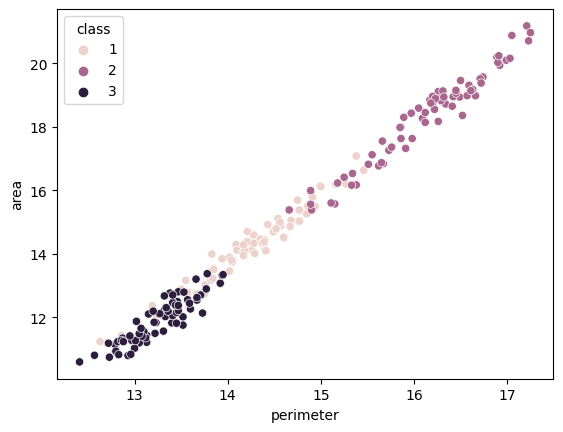

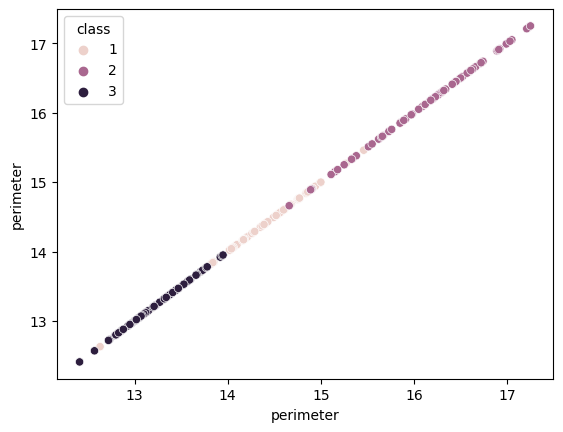

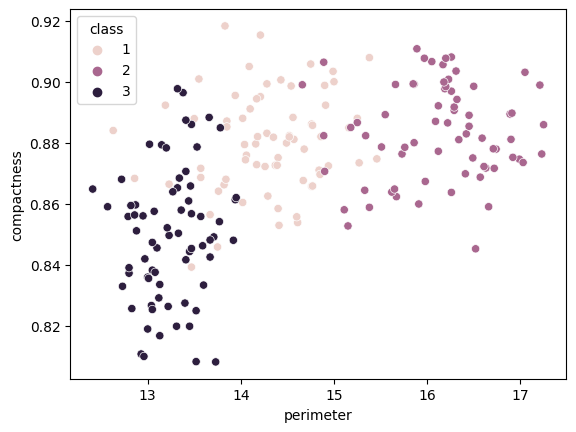

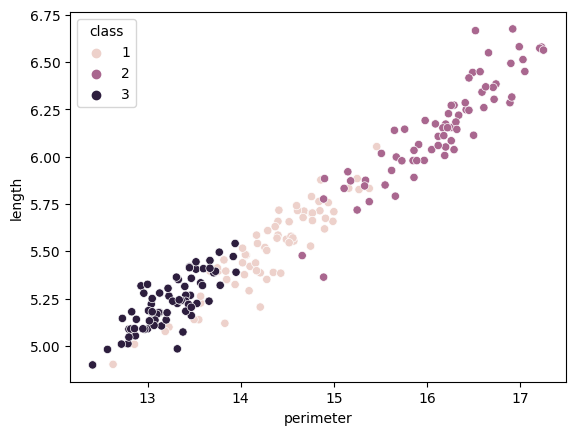

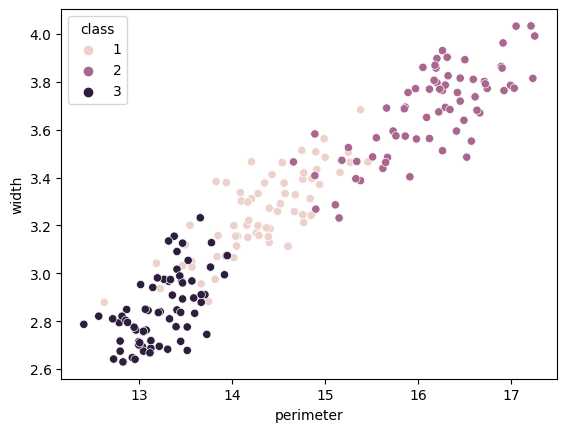

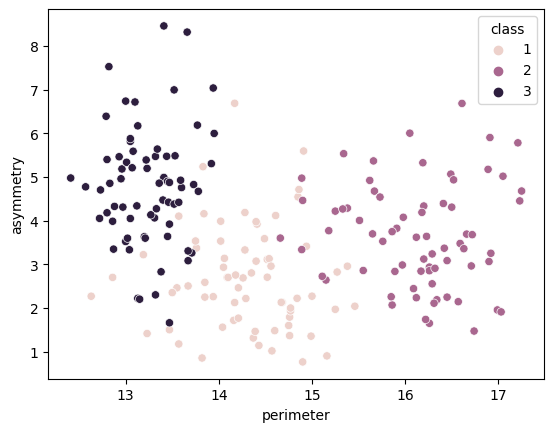

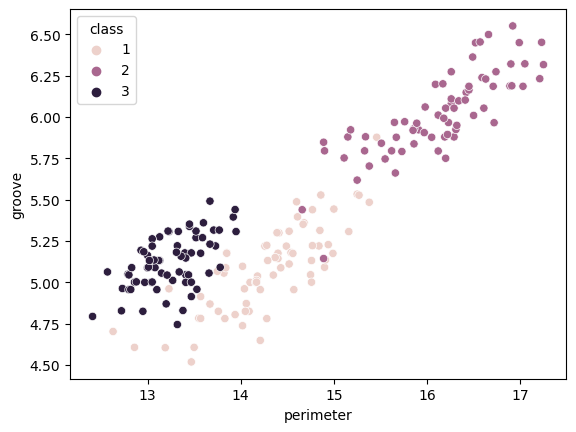

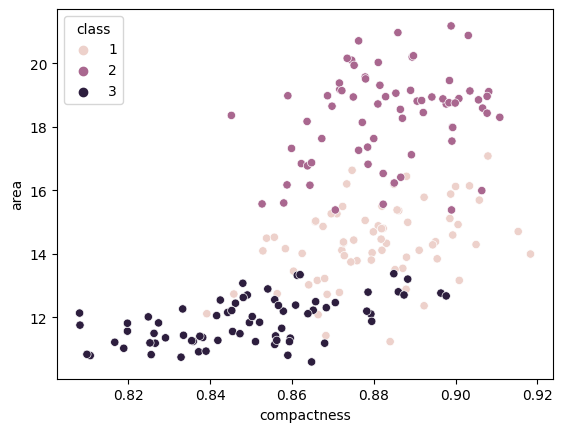

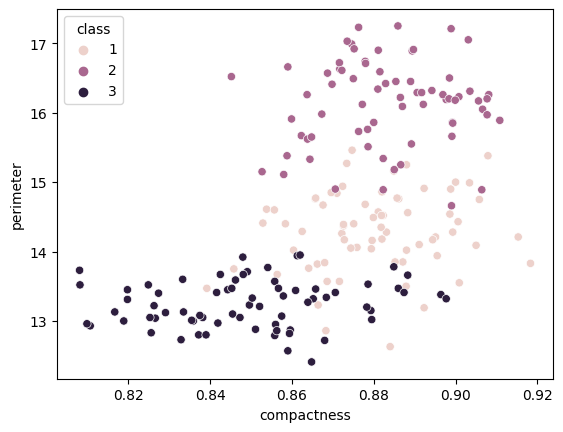

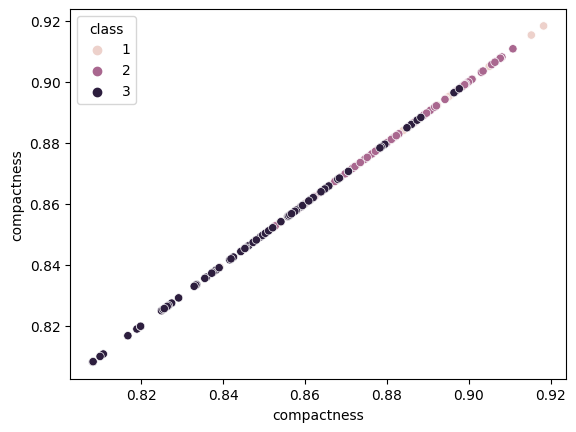

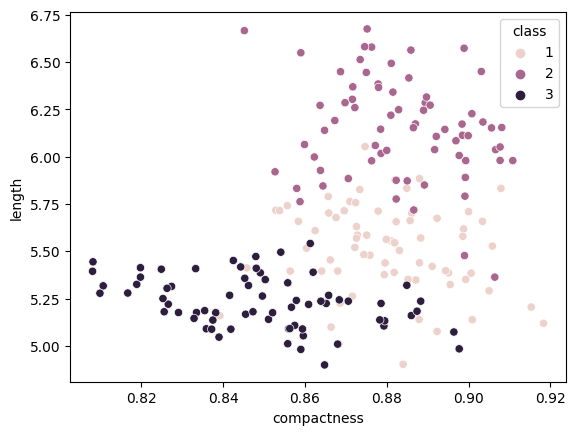

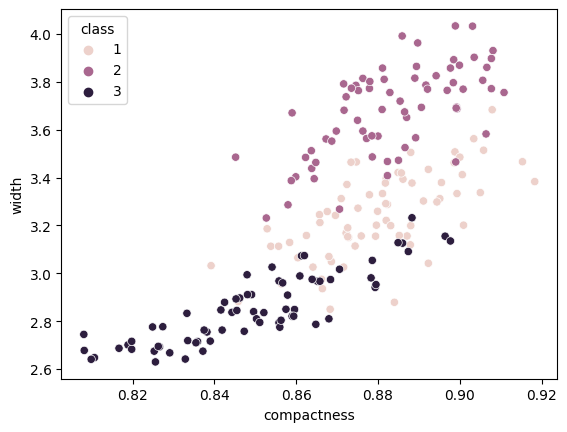

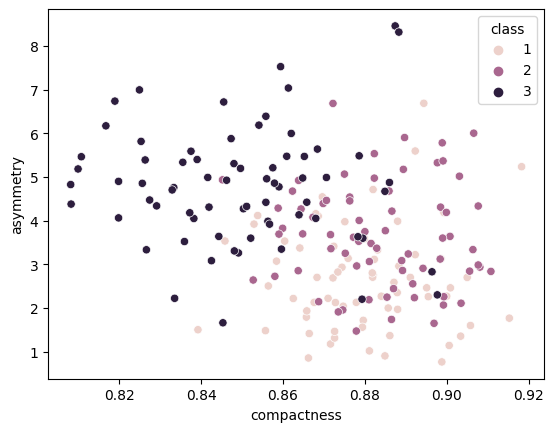

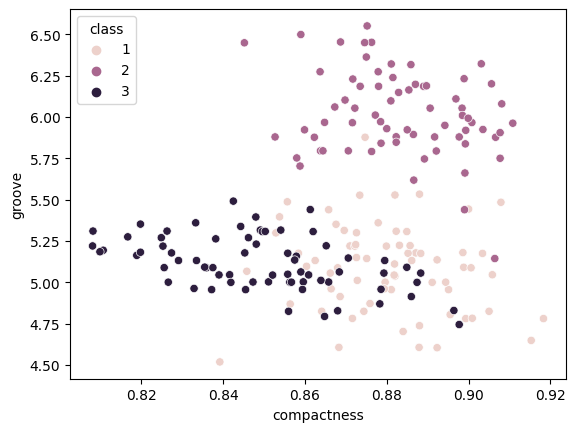

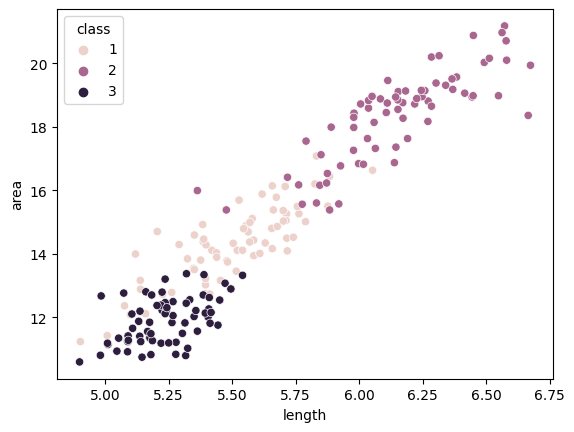

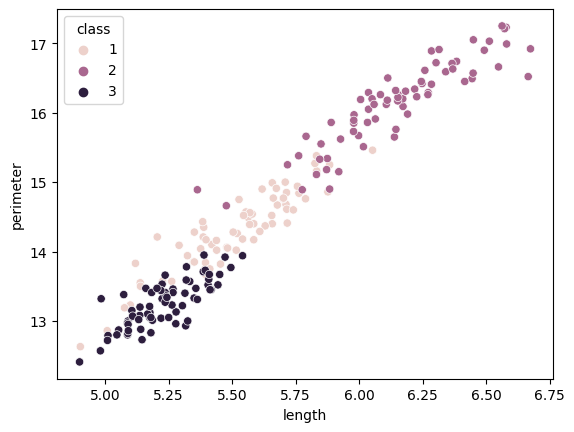

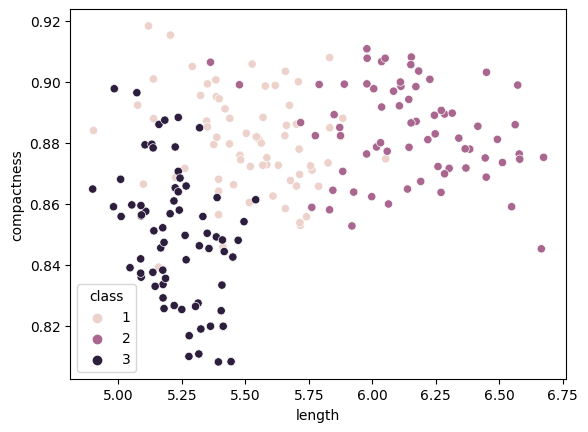

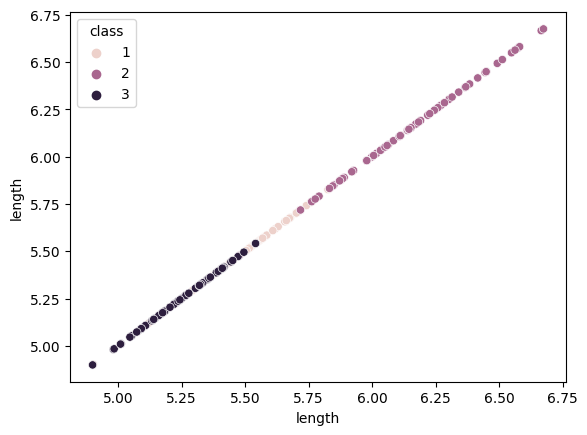

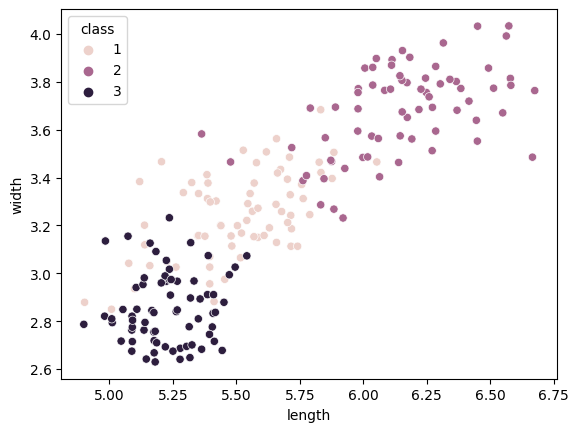

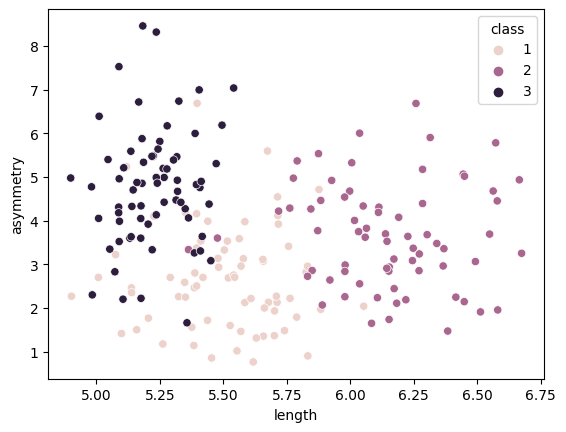

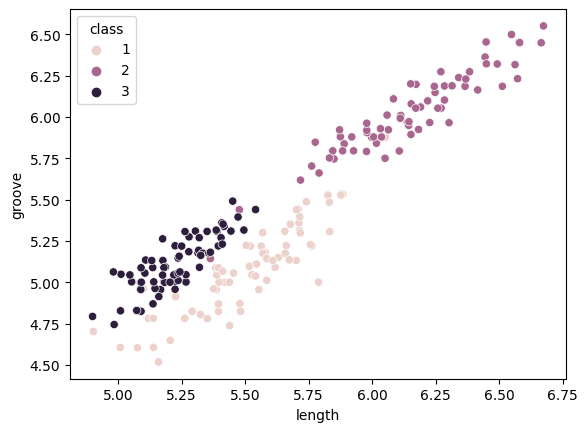

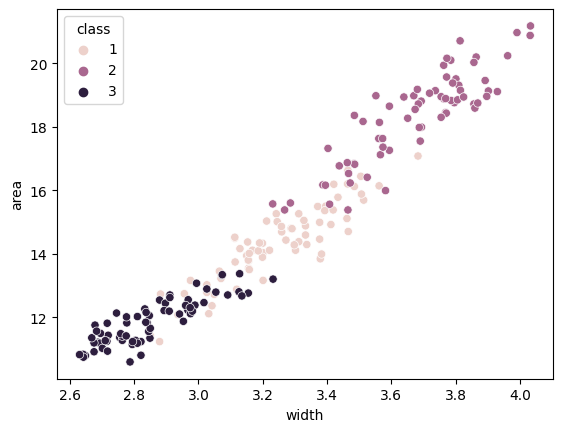

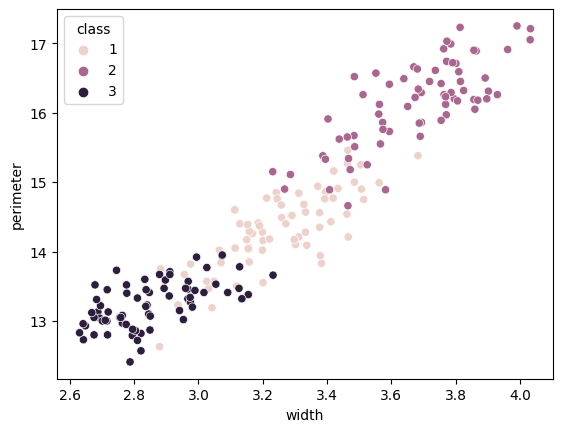

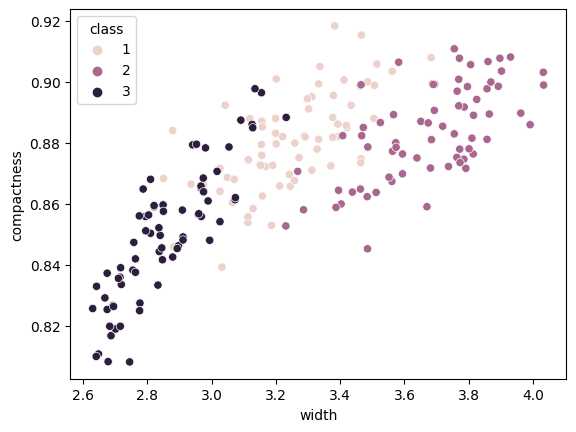

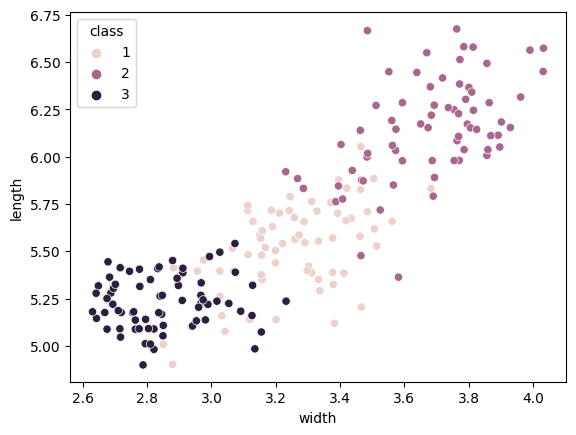

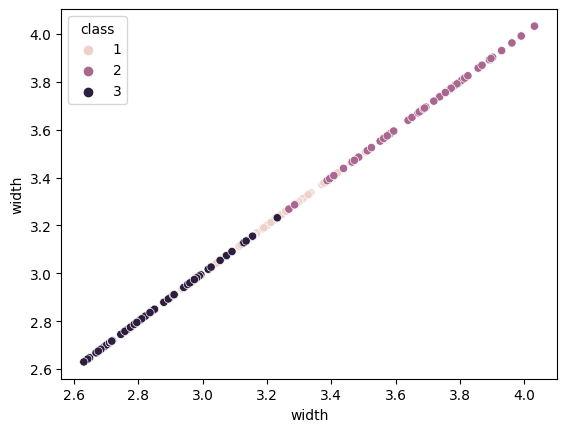

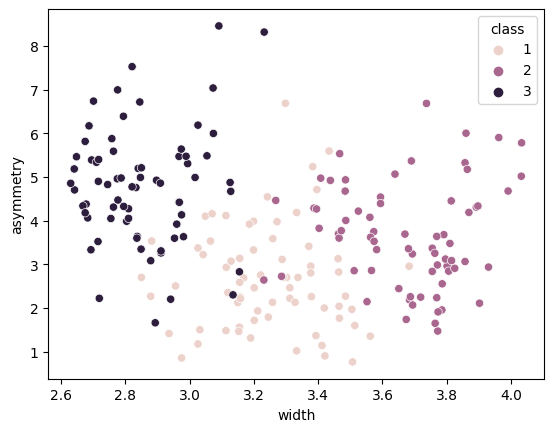

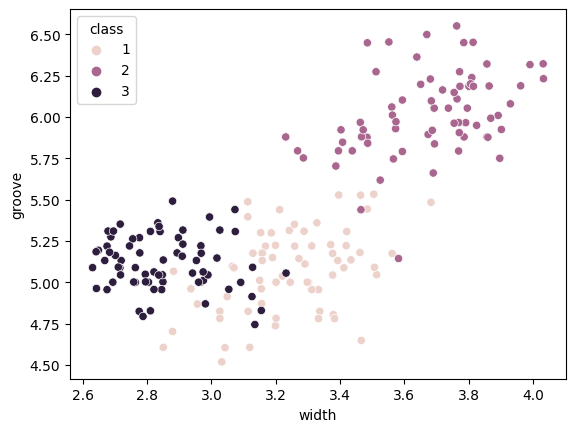

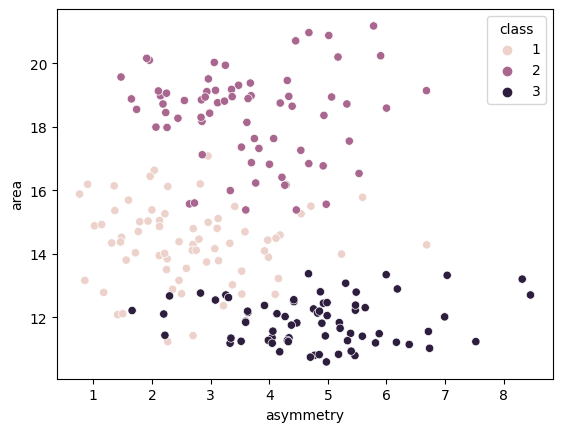

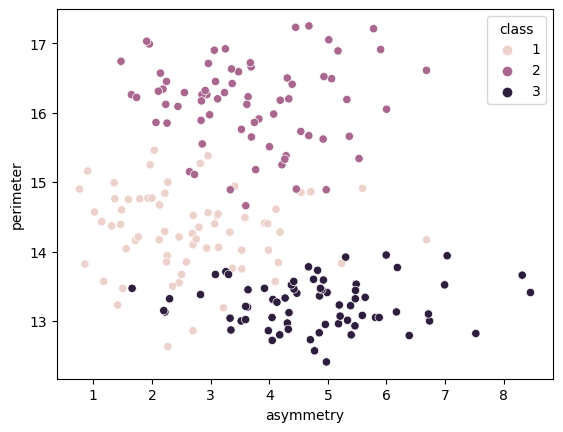

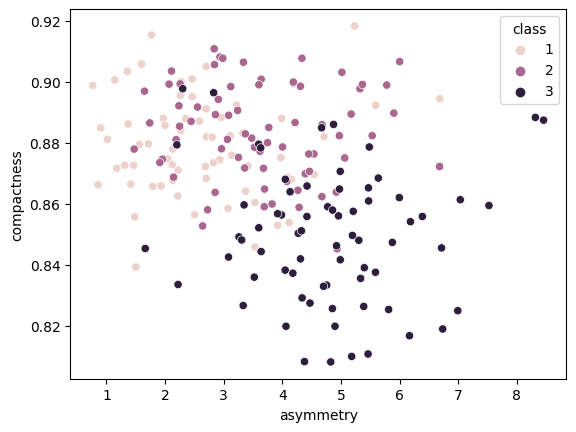

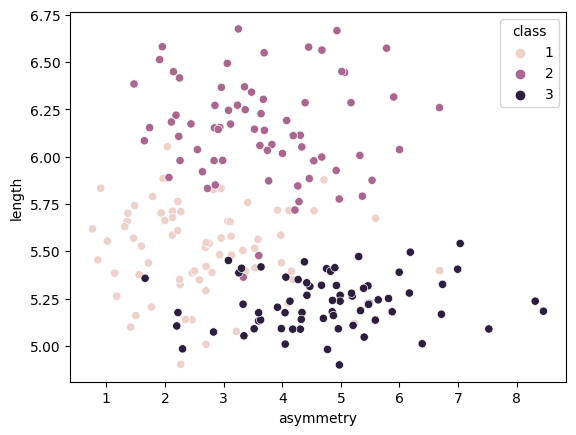

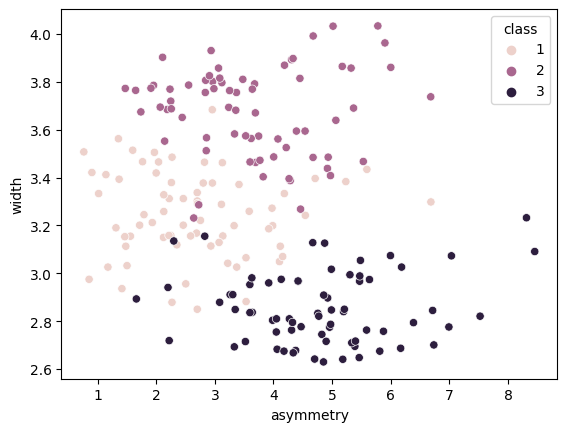

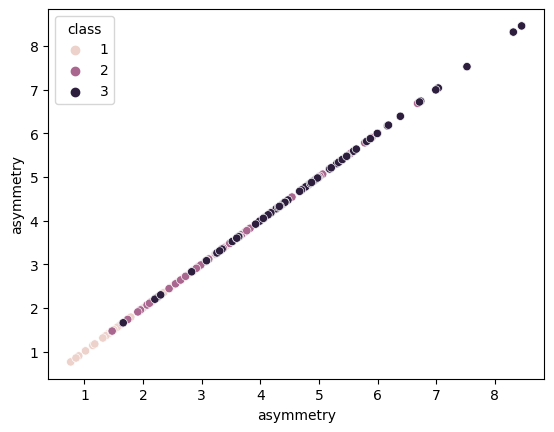

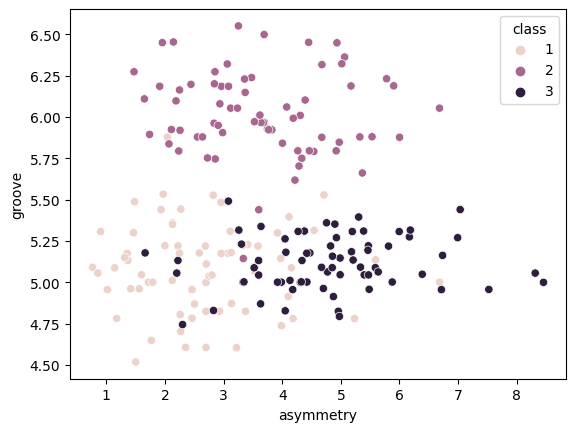

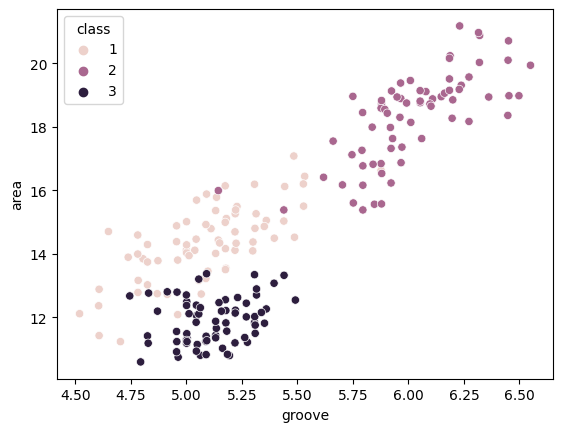

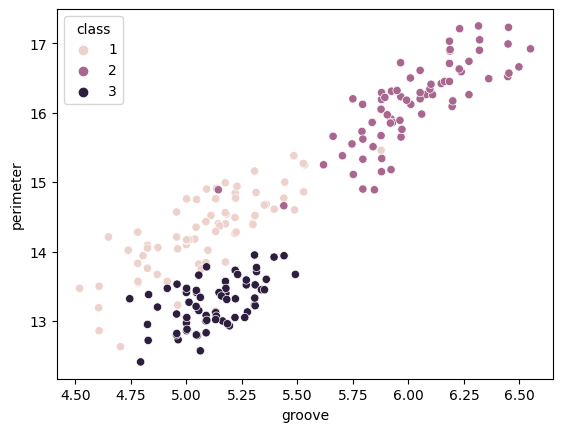

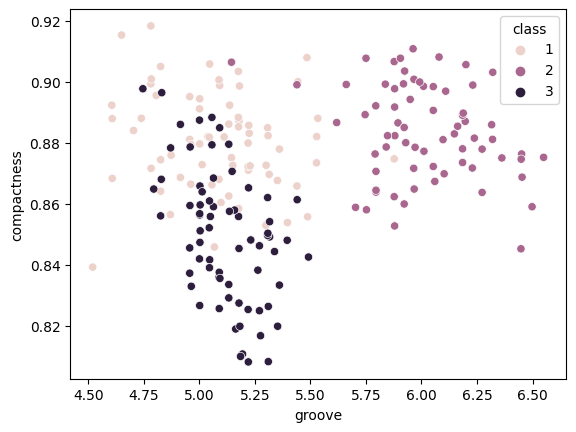

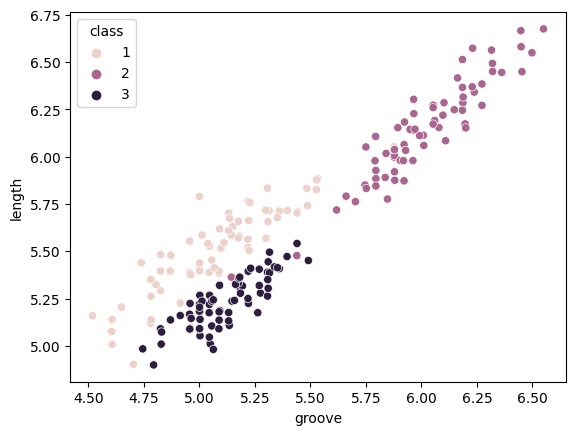

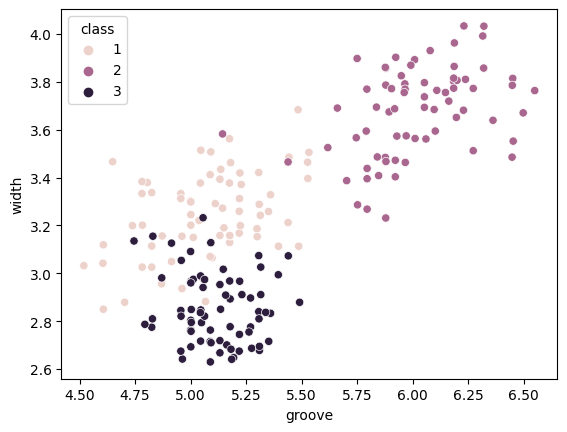

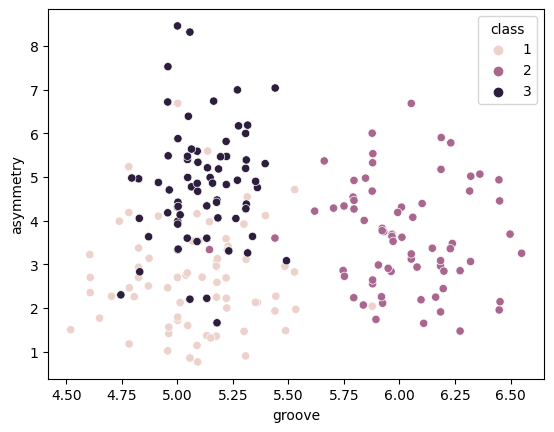

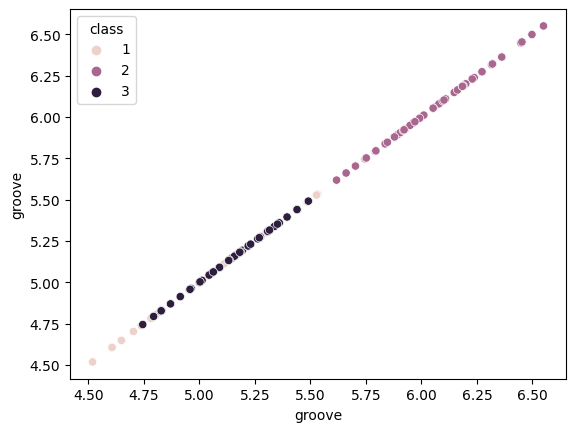

In [ ]:
# we loop throug the df, but excluding last class colunm
for i in range (len(cols)-1): # and creating a grid of xi, xi+1 features to creat a PCA
  for j in range(len(cols)-1):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='class')
    plt.show()


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = "perimeter"
y = "asymmetry"
X = df[[x,y]].values

In [ ]:
kmeans = KMeans(n_clusters = 3).fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters.shape

(210,)

In [ ]:
clusters.reshape((-1,1)).shape

In [ ]:
# actual classes
df["class"].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# creating DataFrame
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns = [x,y,"class"])
cluster_df.head(10)

perimeter  asymmetry  class
0      14.84      2.221    0.0
1      14.57      1.018    0.0
2      14.09      2.699    0.0
3      13.94      2.259    0.0
4      14.99      1.355    0.0
5      14.21      2.462    0.0
6      14.49      3.586    0.0
7      14.10      2.700    0.0
8      15.46      2.040    0.0
9      15.25      1.969    0.0

<function matplotlib.pyplot.show(close=None, block=None)>

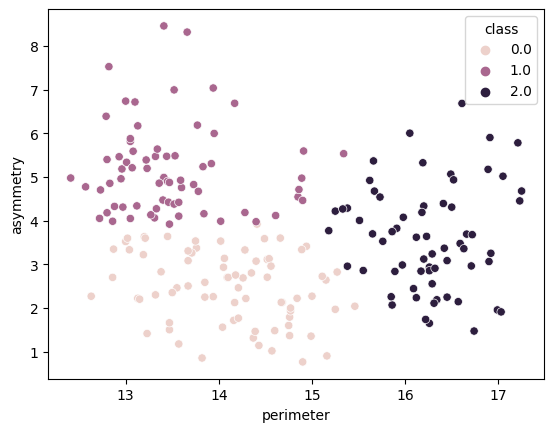

In [ ]:
# KMeans classes
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)
plt.show

# For higher dimensions

In [ ]:
X = df[cols[:-1]].values

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))),columns=df.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

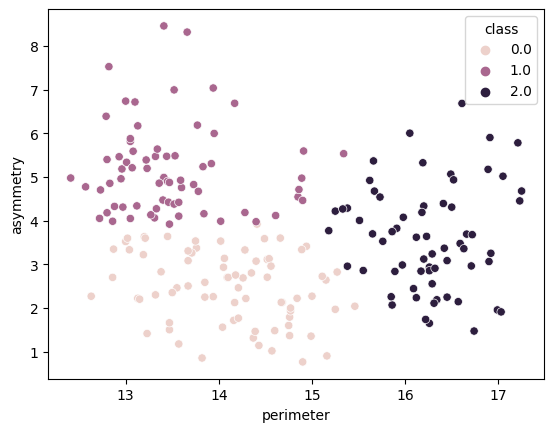

In [ ]:
sns.scatterplot(x=x, y=y, hue='class', data=cluster_df)

plt.plot()

[]

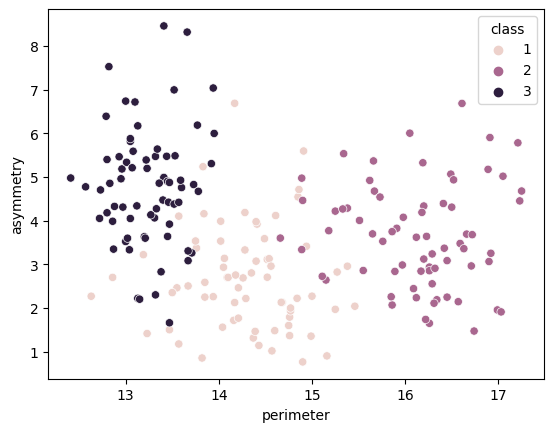

In [ ]:
sns.scatterplot(x=x, y=y, hue='class', data=df)

plt.plot()

In [ ]:
# original data
X.shape

(210, 7)

# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)


In [ ]:
# transformed_data,
transformed_x.shape

(210, 2)

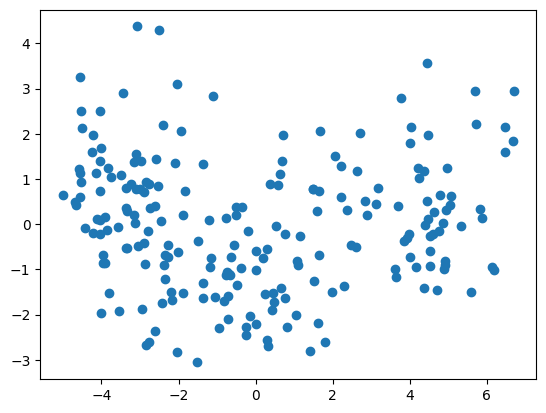

In [ ]:
plt.scatter(transformed_x[:,0],transformed_x[:,1])
plt.show()

In [ ]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x,kmeans.labels_.reshape(-1, 1))), columns=['pca1','pca2', 'class'])


In [ ]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_x,df["class"].values.reshape(-1, 1))), columns=['pca1','pca2', 'class'])

[]

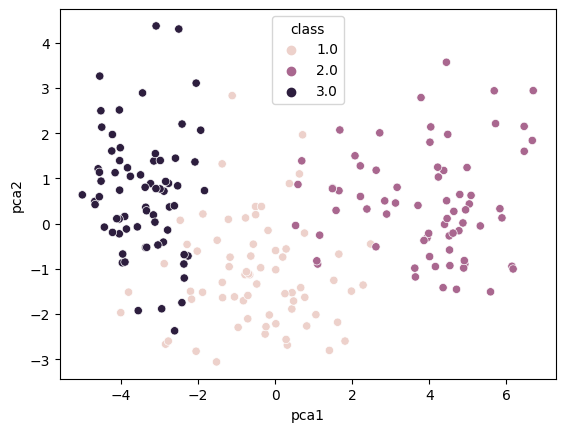

In [ ]:
# Kmeans classes
sns.scatterplot(x='pca1',y='pca2', hue='class',data=kmeans_pca_df)
plt.plot()

In [ ]:
pip install -q tensorflow tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

# Find the datsets
*  https://www.tensorflow.org/datasets/overview
* https://www.tensorflow.org/datasets/catalog/overview
* tfds.list_builders()
* link to github : https://github.com/KeithGalli/neural-nets/blob/master/real_world_example.ipynb

In [ ]:
tfds.list_builders() # different training lists in tf

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_h',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 

# Get info about dataset

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir=PosixGPath('/tmp/tmptp5warcbtfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

# Prepare Rock, Paper, Scissors Data
* https://www.tensorflow.org/datasets/api_docs/python/tfds/visualization/show_examples

In [ ]:
ds_train, info_train  = tfds.load(name='rock_paper_scissors',split='train', with_info=True)
ds_test, info_test = tfds.load(name= 'rock_paper_scissors', split='test', with_info=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete3QSF6M/rock_paper_scissors-train.tfrec…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete3QSF6M/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


# Show examples


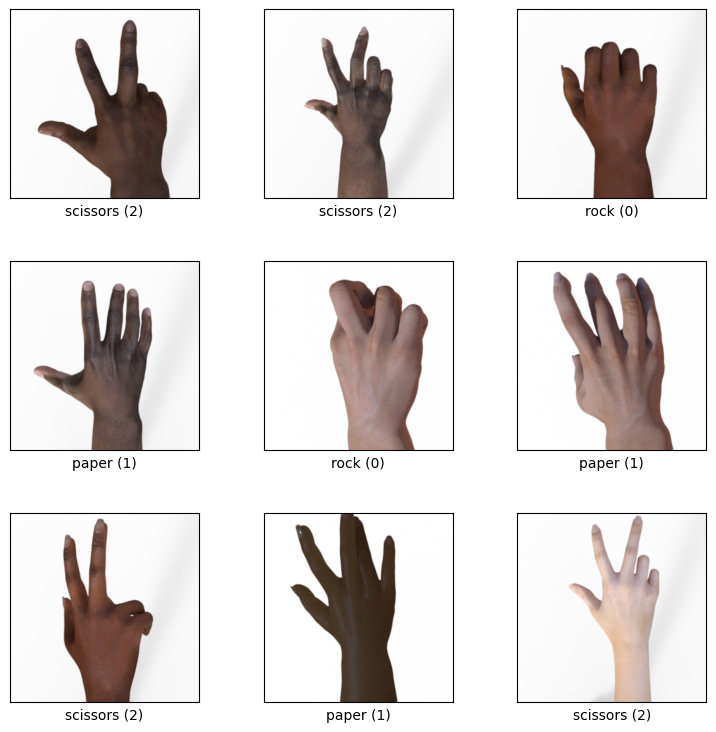

In [ ]:
fig = tfds.show_examples(ds_train, info_train)

In [ ]:
# Additional data prop  for training set
# avoid to take a another or three color channel we could take only [3 firsy dimensions]
train_images = [example['image'].numpy()[:,:,0] for example in ds_train] # example['image'].numpy() save in numpy format
train_images = np.array(train_images)

In [ ]:
type(train_images[0]) #tensorflow.python.framework.ops.EagerTensor

numpy.ndarray

In [ ]:
train_images[0].shape

(300, 300)

In [ ]:
train_images.shape # 2520 is the number of pic, 300,300 pixels of  pictures

(2520, 300, 300)

In [ ]:
train_labels = np.array([example['label'].numpy() for example in ds_train]) # label for training sets

In [ ]:
# for test sets
test_images = [example['image'].numpy()[:,:,0] for example in ds_test] # example['image'].numpy() save in numpy format
test_images = np.array(test_images)
test_labels = np.array([example['label'].numpy() for example in ds_test]) # label for training sets

In [ ]:
train_images.shape, train_labels.shape

((2520, 300, 300), (2520,))

In [ ]:
test_images.shape, test_labels.shape

((372, 300, 300), (372,))

In [ ]:
# train_imeges = train_images.reshape(2520, 300, 300,1)
train_images = train_images.reshape(2520, 300, 300,1) # 1-at the end is a color channel, gray-color
test_images = test_images.reshape(372, 300, 300,1) # 1-at the end is a color channel, gray-color
train_images.dtype

dtype('uint8')

In [ ]:
# We have to convert the unit8 values to float
# then divide our image's tensors by "255-max value in RGB channels"
# our numbers will be between 0....1 (normalization)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
# normalization
train_images /=255
test_images /=255


In [ ]:
train_images[0]
train_images.dtype

dtype('float32')

# Basic training approach

In [ ]:
# creating simple model
model = keras.Sequential([
     keras.layers.Flatten(), # zero layer that convert image (300, 300, 1) to one row, column array (90000,)
     keras.layers.Dense(512, activation='relu'), # first layer
     keras.layers.Dense(256, activation = 'relu'), # second layer
     keras.layers.Dense(3, activation = 'softmax')  # third layer
    ])
# loss function for model
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])
# fitting model with real data
model.fit(train_images, train_labels, epochs = 5, batch_size = 32 )

Epoch 1/5
79/79 [==============================] - 77s 929ms/step - loss: 31.9725 - accuracy: 0.3956
Epoch 2/5
79/79 [==============================] - 68s 866ms/step - loss: 1.3020 - accuracy: 0.6675
Epoch 3/5
79/79 [==============================] - 76s 968ms/step - loss: 1.0199 - accuracy: 0.7524
Epoch 4/5
79/79 [==============================] - 65s 821ms/step - loss: 0.8638 - accuracy: 0.7774
Epoch 5/5
79/79 [==============================] - 86s 1s/step - loss: 0.8322 - accuracy: 0.7802


In [ ]:
# use for model, how model generalize unseen data
model.evaluate(test_images, test_labels)

12/12 [==============================] - 5s 374ms/step - loss: 1.8540 - accuracy: 0.5242


[1.8539611101150513, 0.524193525314331]

# Training network Convolutional Neuralnetwork (CNN)

In [ ]:
# we passing the small grid across big image and by means of this grid, model pullout general features and learn, study
# filters - how many smaller grids (have different shapes, parterns) we pass across our image
# kernel_size - it is how big our smallest grid (3x3) or (4x4)
# strides =(1,1) it means it would move by one grid sell (3x3 or) by default
# activation ='relu' ?
# input_shape=(300,300,1)
#
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, activation='relu',input_shape=(300,300, 1)),
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels,epochs=5, batch_size=32)


Epoch 1/5
51/79 [==================>...........] - ETA: 7:18 - loss: 5.0269 - accuracy: 0.6268

In [ ]:
# use for model, how model generalize unseen data
model.evaluate(test_images, test_labels)

# Better convolutional model

In [ ]:
# reduce the resolution of this images (only basic features)
# pool_size = (3,3) or

model = keras.Sequential([
    keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation = 'relu'),
    keras.layers.MaxPool2D(2,2), # moving (2,2) grid to take max pixels
    keras.layers.Dropout(0.5), # after MaxPool2D it cuts out 50% of links, connections
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.fit(train_images, train_labels,epochs=5, batch_size=32)

In [ ]:
model.evaluate(test_images, test_labels)


# Hyperparameter Turning

In [ ]:
pip install -U keras-tuner

In [ ]:
# add automatically pick the best hyperparameters
#form kerastuner.tuners import RandomSearch
import keras_tuner
import kerastuner as kt

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)))
  model.add(keras.layers.Conv2D(64,3, activation ='relu'))
  model.add(keras.layers.Conv2D(32,3, activation = 'relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(hp.Choice("Dense layer", [64,128,256, 512, 1024]), activation='relu',))
  model.add(keras.layers.Dense(3, activation='softmax'))
  model.compile(optimizer='adam',
                loss= keras.losses.SparseCategoricalCrossentropy,
                metrics = ['accuracy'])
  return model

tuner = kt.RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=5,

)

tuner.search(train_images, train_labels,epochs=10, validation_data=(test_images, test_labels))

#best_model = tuner.get_best_models()[0]
